#**Time Series forecasting**

# Get Data

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-08 12:29:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-07-08 12:29:04 (7.49 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



Pandas

In [ ]:
## there are few ways to read
### pandas

import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                               parse_dates=['Date'],
                               index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
df.shape

(2787, 5)

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


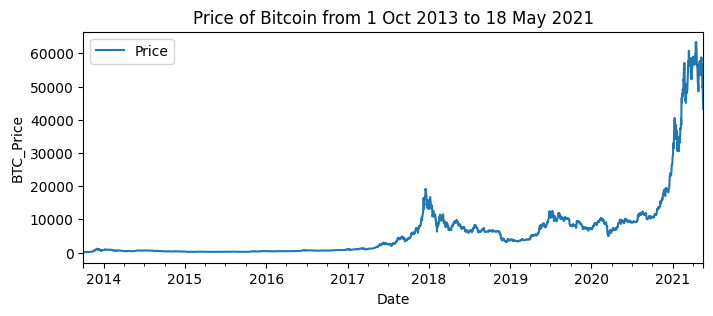

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(8,3), ylabel='BTC_Price', title='Price of Bitcoin from 1 Oct 2013 to 18 May 2021')
plt.show()

In [ ]:
import csv
from datetime import datetime

In [ ]:
!head -2 '/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349


In [ ]:
timesteps=[]
btc_prices =[]


with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as file:
    data = csv.reader(file, delimiter=',')
    next(data)
    for row in data:
        timesteps.append(datetime.strptime(row[1], "%Y-%m-%d")) # get the dates as dates not as strings
        btc_prices.append(float(row[2]))

In [ ]:
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

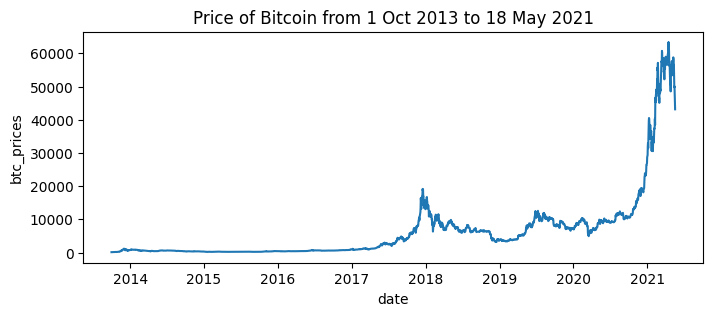

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(timesteps, btc_prices)
plt.ylabel('btc_prices')
plt.xlabel('date')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021')
plt.show()

In [ ]:
# convert to numpy arrays
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()

In [ ]:
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

### Wrong way of spliting time series data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

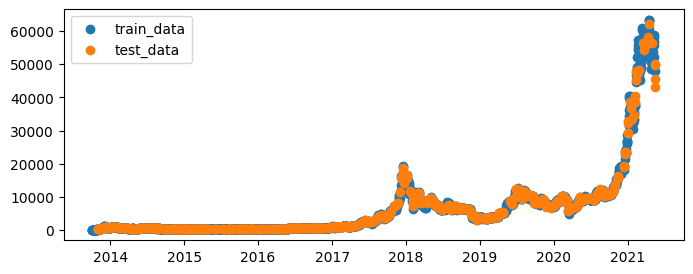

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(X_train, y_train, label='train_data')
plt.scatter(X_test, y_test, label='test_data')
plt.legend()
plt.show()

### Create train and test data right way

In [ ]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

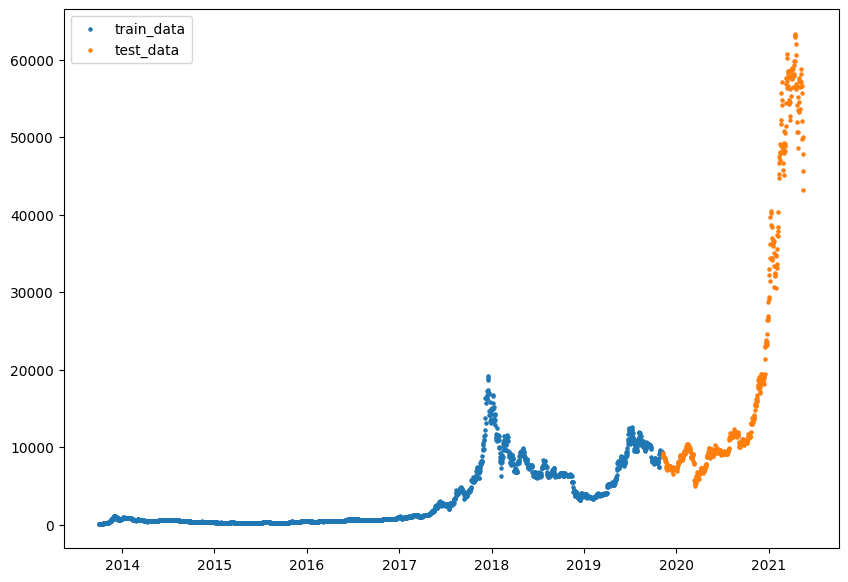

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='train_data')
plt.scatter(X_test, y_test, s=5, label='test_data')
plt.legend()
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None, xlabel='time', ylabel='bitcoin_prices'):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if label:
      plt.legend(fontsize=14)
    plt.grid(True)

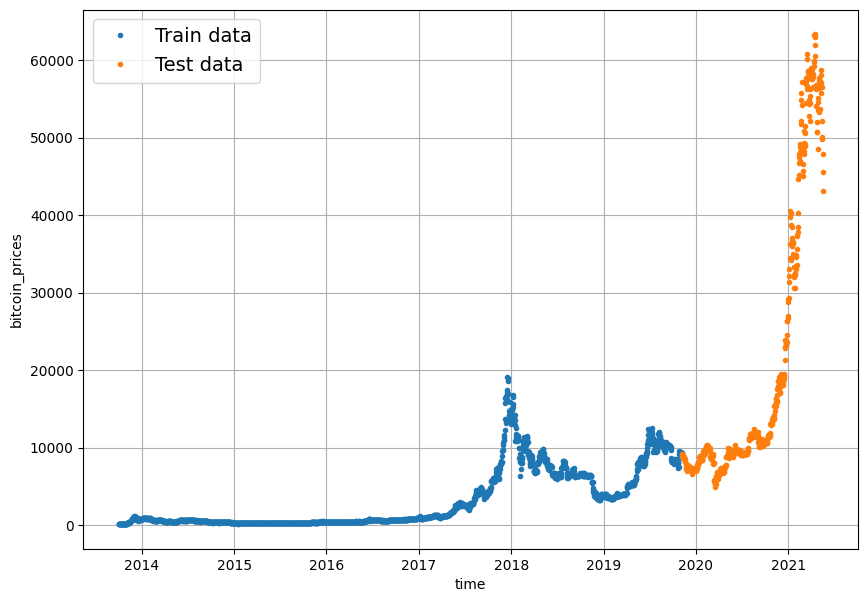

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train data')
plot_time_series(X_test, y_test, label='Test data')

# Modelling Experiments

Terms to be familiar
- horizon: # of timesteps we are going to predict
- window: # of timesteps we will use to predict

## Baseline Model: Naive Forecast

$$\hat{y}_{t} = y_{t-1}$$


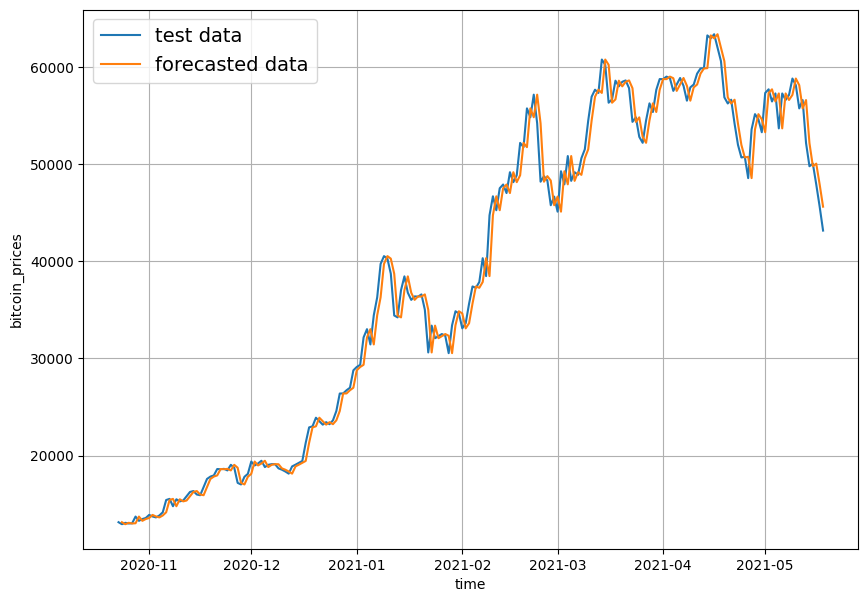

In [ ]:
## naive forecasting

naive_forecast  = y_test[:-1]
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label='train data')
plot_time_series(X_test, y_test, format='-', start=350, label='test data')
plot_time_series(X_test[1:], naive_forecast, format='-', start=350, label='forecasted data')


> 🛠 **Exercise:** Spend 10 minutes reading the [simple forecasts chapter of Forecasting: Principles in Practice](https://otexts.com/fpp3/simple-methods.html). And have a search to find out why the naive forecast is hard to beat, does the term augoregressive come up?

## Evaluating metrics for Time Series problem

- MSE
Scale-dependent errors: forecast errors are on the same scale as the data
- MAE
- RMSE

- MAPE/sMAPE : unit-free
- MASE

for all metrics lower is better

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # mase - no_seasonality
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

    return mae / mae_naive_no_season

In [ ]:
# MASE for Naive forecast will 1
# MASE > 1 will be worse than Naive and MASE < 1 will be better than Naive
mase = mean_absolute_scaled_error(y_test[1:], y_test[:-1]).numpy()
mase

0.9995699939182624

In [ ]:
def evaluate_results(y_true, y_pred):
    # meke sure tf expect the data in float32

    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {'mae':mae.numpy(), 'mse':mse.numpy(), 'rmse':rmse.numpy(), 'mape':mape.numpy(), 'mase':mase.numpy()}

In [ ]:
naive_results = evaluate_results(y_test[1:], y_test[:-1])
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [ ]:
print(f"So we want to use {btc_prices[:7]} to predict next {btc_prices[7]}")

So we want to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict next 123.033


In [ ]:
# lets set up global variables
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use 7 days data to make next day prediction

In [ ]:
# Get labelled data

def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
tf.constant(range(8), shape=(1,8))

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
tf.expand_dims(tf.range(8), axis=0).shape

TensorShape([1, 8])

In [ ]:
x = tf.expand_dims(tf.range(8), axis=0)
window, label = get_labelled_window(x, horizon=HORIZON)
print(f"Window: {tf.squeeze(window)} --> Label: {tf.squeeze(label)}")

Window: [0 1 2 3 4 5 6] --> Label: 7


In [ ]:
# Using broadcasting tricks to generate window indices
np.expand_dims(np.arange(5), axis=0)  + np.expand_dims(np.arange(10), axis=0).T

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]])

In [ ]:
# we can use for loop, but that would not be very effecient
## check out numpy indexing
## use numpy indexing to create 2D array of multiple window steps

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    # create window of specific size
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0) # creating the array

    # create window indexes
    window_indices = window_step + np.expand_dims(np.arange(len(x) -(window_size + horizon - 1)), axis=0).T #broadcasting creates 2D array

    # index on the target array
    windowed_array = x[window_indices]

    # get the window and label
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)

    return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
## viewing first few windows and labels
for i in range(3):
    print(f"Window: {full_windows[i]} --> Labels: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Labels: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Labels: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Labels: [125.96116]


In [ ]:
## viewing last few windows and labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} --> Labels: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> Labels: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> Labels: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> Labels: [43144.47129086]


In [ ]:
# generating train and test sets
def make_train_test_split(windows, labels, test_split=0.2):
    split_size= int(len(windows)* (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]

    return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows,
                                                                               labels=full_labels, test_split=0.2)

In [ ]:
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [ ]:
train_labels[-1]

array([8794.35864452])

In [ ]:
train_windows[:2]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ]])

In [ ]:
test_windows[:2]

array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
        9335.75240233, 9226.48582088, 8794.35864452],
       [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463]])

In [ ]:
np.squeeze(train_labels)

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9335.75240233,
       9226.48582088, 8794.35864452])

In [ ]:
# recall the y_train variable which is our bit prices, this is what we windowed
y_train[:10], y_train.shape

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]),
 (2229,))

In [ ]:
# to compare now created train_labels with y_train, we actually start considering y_train[window_size:] onwards
y_train[WINDOW_SIZE:]

array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
# Check to see if train labels(we go till last -1) are the same before and after split
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
train_labels.shape, y_train.shape

((2224, 1), (2229,))

In [ ]:
print(train_windows[-5:], '\n\n', train_labels[-5:], '\n\n', y_train[-5:])

[[9458.22335963 9455.72469261 9225.99547934 9131.41063031 9197.63234462
  9290.89660239 9202.41545055]
 [9455.72469261 9225.99547934 9131.41063031 9197.63234462 9290.89660239
  9202.41545055 9369.62808116]
 [9225.99547934 9131.41063031 9197.63234462 9290.89660239 9202.41545055
  9369.62808116 9326.59962378]
 [9131.41063031 9197.63234462 9290.89660239 9202.41545055 9369.62808116
  9326.59962378 9335.75240233]
 [9197.63234462 9290.89660239 9202.41545055 9369.62808116 9326.59962378
  9335.75240233 9226.48582088]] 

 [[9369.62808116]
 [9326.59962378]
 [9335.75240233]
 [9226.48582088]
 [8794.35864452]] 

 [9290.89660239 9202.41545055 9369.62808116 9326.59962378 9335.75240233]


## Making  Model Checkpoint

In [ ]:
## model checkpoint
import os

#create a new checkpoint for every model
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              verbose=0,
                                              save_best_only=True)

## Model-1: Dense model (windows=7, horizon=1)

In [ ]:
from tensorflow.keras import layers

In [ ]:
# model-1
tf.random.set_seed=42

model_1 = tf.keras.Sequential([
      layers.Dense(128, activation='relu'),
      layers.Dense(HORIZON, activation='linear') #linear activation is same a s having no activation
], name='model_1_dense')

model_1.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 3075.8396 - mae: 3075.8396 - mse: 24353462.0000  

18/18 [==============================] - 8s 105ms/step - loss: 2642.0330 - mae: 2642.0330 - mse: 18914594.0000 - val_loss: 6264.2666 - val_mae: 6264.2666 - val_mse: 71985240.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 480.5037 - mae: 480.5037 - mse: 813729.9375

18/18 [==============================] - 1s 61ms/step - loss: 483.5052 - mae: 483.5052 - mse: 814198.4375 - val_loss: 1724.5049 - val_mae: 1724.5049 - val_mse: 8461077.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 259.4533 - mae: 259.4533 - mse: 241558.4062

18/18 [==============================] - 2s 89ms/step - loss: 245.1837 - mae: 245.1837 - mse: 263017.5312 - val_loss: 1105.3893 - val_mae: 1105.3893 - val_mse: 4102457.0000
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 207.3501 - mae: 207.3501 - mse: 213273.7031

18/18 [==============================] - 3s 164ms/step - loss: 206.4563 - mae: 206.4563 - mse: 217633.3125 - val_loss: 1066.3251 - val_mae: 1066.3251 - val_mse: 3815879.7500
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 191.0886 - mae: 191.0886 - mse: 192265.5938

18/18 [==============================] - 2s 104ms/step - loss: 190.4904 - mae: 190.4904 - mse: 190277.2188 - val_loss: 1065.8760 - val_mae: 1065.8760 - val_mse: 3605858.0000
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 191.7169 - mae: 191.7169 - mse: 198417.4062

18/18 [==============================] - 2s 99ms/step - loss: 183.3789 - mae: 183.3789 - mse: 178547.0000 - val_loss: 1007.2183 - val_mae: 1007.2183 - val_mse: 3347801.7500
Epoch 7/100
 8/18 [============>.................] - ETA: 0s - loss: 184.5256 - mae: 184.5256 - mse: 181963.5312

18/18 [==============================] - 2s 98ms/step - loss: 177.3274 - mae: 177.3274 - mse: 167215.3125 - val_loss: 974.7647 - val_mae: 974.7647 - val_mse: 3161451.2500
Epoch 8/100
18/18 [==============================] - 0s 16ms/step - loss: 179.9246 - mae: 179.9246 - mse: 167893.7656 - val_loss: 1025.5442 - val_mae: 1025.5442 - val_mse: 3165645.0000
Epoch 9/100
12/18 [===================>..........] - ETA: 0s - loss: 171.5830 - mae: 171.5830 - mse: 160723.9844

18/18 [==============================] - 2s 96ms/step - loss: 168.9295 - mae: 168.9295 - mse: 152707.0312 - val_loss: 937.2245 - val_mae: 937.2245 - val_mse: 2844152.5000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 163.6944 - mae: 163.6944 - mse: 145314.3594

18/18 [==============================] - 2s 126ms/step - loss: 163.9123 - mae: 163.9123 - mse: 144841.0156 - val_loss: 908.2078 - val_mae: 908.2078 - val_mse: 2688820.0000
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 160.4847 - mae: 160.4847 - mse: 137692.1719

18/18 [==============================] - 3s 202ms/step - loss: 161.0916 - mae: 161.0916 - mse: 139994.7500 - val_loss: 872.3875 - val_mae: 872.3875 - val_mse: 2539044.7500
Epoch 12/100
18/18 [==============================] - 0s 16ms/step - loss: 155.0847 - mae: 155.0847 - mse: 130671.3828 - val_loss: 892.9282 - val_mae: 892.9282 - val_mse: 2477119.0000
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 150.8483 - mae: 150.8483 - mse: 129531.3906

18/18 [==============================] - 2s 110ms/step - loss: 150.7040 - mae: 150.7040 - mse: 123129.3516 - val_loss: 838.1658 - val_mae: 838.1658 - val_mse: 2278375.2500
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 147.3690 - mae: 147.3690 - mse: 120685.6016

18/18 [==============================] - 2s 108ms/step - loss: 147.1230 - mae: 147.1230 - mse: 119978.1172 - val_loss: 824.6195 - val_mae: 824.6195 - val_mse: 2173850.7500
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 143.5681 - mae: 143.5681 - mse: 115189.1484

18/18 [==============================] - 2s 117ms/step - loss: 144.8820 - mae: 144.8820 - mse: 114962.9531 - val_loss: 780.7443 - val_mae: 780.7443 - val_mse: 2055974.6250
Epoch 16/100
18/18 [==============================] - 0s 15ms/step - loss: 142.2503 - mae: 142.2503 - mse: 112562.3125 - val_loss: 804.2326 - val_mae: 804.2326 - val_mse: 2019145.2500
Epoch 17/100
18/18 [==============================] - 0s 11ms/step - loss: 139.5851 - mae: 139.5851 - mse: 105904.3203 - val_loss: 801.4330 - val_mae: 801.4330 - val_mse: 1976679.6250
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 137.6676 - mae: 137.6676 - mse: 107661.9844

18/18 [==============================] - 2s 107ms/step - loss: 135.5259 - mae: 135.5259 - mse: 103794.3828 - val_loss: 732.3398 - val_mae: 732.3398 - val_mse: 1809531.5000
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 129.7044 - mae: 129.7044 - mse: 85170.7891

18/18 [==============================] - 2s 137ms/step - loss: 133.7707 - mae: 133.7707 - mse: 100692.6406 - val_loss: 719.4328 - val_mae: 719.4328 - val_mse: 1739464.0000
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 132.2980 - mae: 132.2980 - mse: 98291.9844 

18/18 [==============================] - 2s 140ms/step - loss: 131.7886 - mae: 131.7886 - mse: 97206.3828 - val_loss: 709.0853 - val_mae: 709.0853 - val_mse: 1708614.0000
Epoch 21/100
18/18 [==============================] - 0s 14ms/step - loss: 128.0366 - mae: 128.0366 - mse: 93138.6797 - val_loss: 711.7926 - val_mae: 711.7926 - val_mse: 1654517.1250
Epoch 22/100
 9/18 [==============>...............] - ETA: 0s - loss: 126.9279 - mae: 126.9279 - mse: 83469.8828 

18/18 [==============================] - 2s 102ms/step - loss: 132.1974 - mae: 132.1974 - mse: 93932.6953 - val_loss: 687.3833 - val_mae: 687.3833 - val_mse: 1601473.6250
Epoch 23/100
18/18 [==============================] - 0s 14ms/step - loss: 126.8759 - mae: 126.8759 - mse: 91378.9609 - val_loss: 747.5861 - val_mae: 747.5861 - val_mse: 1840808.8750
Epoch 24/100
18/18 [==============================] - 0s 16ms/step - loss: 128.7674 - mae: 128.7674 - mse: 92173.1875 - val_loss: 696.6285 - val_mae: 696.6285 - val_mse: 1578016.6250
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 125.7328 - mae: 125.7328 - mse: 90129.8203

18/18 [==============================] - 1s 86ms/step - loss: 125.7328 - mae: 125.7328 - mse: 90129.8203 - val_loss: 673.6182 - val_mae: 673.6182 - val_mse: 1517268.0000
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 131.9529 - mae: 131.9529 - mse: 114082.2188

18/18 [==============================] - 1s 54ms/step - loss: 121.3758 - mae: 121.3758 - mse: 86225.5312 - val_loss: 658.4947 - val_mae: 658.4947 - val_mse: 1491666.1250
Epoch 27/100
18/18 [==============================] - 0s 11ms/step - loss: 122.2711 - mae: 122.2711 - mse: 87331.4375 - val_loss: 660.3768 - val_mae: 660.3768 - val_mse: 1467103.8750
Epoch 28/100
18/18 [==============================] - 0s 18ms/step - loss: 122.6368 - mae: 122.6368 - mse: 86277.6250 - val_loss: 678.9274 - val_mae: 678.9274 - val_mse: 1565486.1250
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 125.0273 - mae: 125.0273 - mse: 87407.5312

18/18 [==============================] - 1s 77ms/step - loss: 123.5101 - mae: 123.5101 - mse: 86714.8516 - val_loss: 652.1105 - val_mae: 652.1105 - val_mse: 1476691.5000
Epoch 30/100
18/18 [==============================] - 0s 11ms/step - loss: 121.4661 - mae: 121.4661 - mse: 85021.5469 - val_loss: 725.4436 - val_mae: 725.4436 - val_mse: 1609027.8750
Epoch 31/100
18/18 [==============================] - 0s 15ms/step - loss: 127.7357 - mae: 127.7357 - mse: 89131.3750 - val_loss: 754.4415 - val_mae: 754.4415 - val_mse: 1686039.1250
Epoch 32/100
18/18 [==============================] - 0s 10ms/step - loss: 123.1060 - mae: 123.1060 - mse: 86341.4766 - val_loss: 720.3464 - val_mae: 720.3464 - val_mse: 1588576.5000
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6363 - mae: 121.6363 - mse: 84739.1328

18/18 [==============================] - 1s 63ms/step - loss: 121.2289 - mae: 121.2289 - mse: 84148.8438 - val_loss: 631.9364 - val_mae: 631.9364 - val_mse: 1378653.5000
Epoch 34/100
18/18 [==============================] - 0s 11ms/step - loss: 116.7501 - mae: 116.7501 - mse: 81177.1016 - val_loss: 653.0634 - val_mae: 653.0634 - val_mse: 1417209.7500
Epoch 35/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.0670 - mae: 120.0670 - mse: 86067.2891

18/18 [==============================] - 1s 72ms/step - loss: 118.1791 - mae: 118.1791 - mse: 82381.2500 - val_loss: 625.1730 - val_mae: 625.1730 - val_mse: 1363200.0000
Epoch 36/100
18/18 [==============================] - 0s 13ms/step - loss: 116.4581 - mae: 116.4581 - mse: 81104.1172 - val_loss: 662.4987 - val_mae: 662.4987 - val_mse: 1432120.0000
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 116.2209 - mae: 116.2209 - mse: 77846.6953

18/18 [==============================] - 2s 139ms/step - loss: 117.2089 - mae: 117.2089 - mse: 79863.6875 - val_loss: 621.5219 - val_mae: 621.5219 - val_mse: 1355652.8750
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 113.9989 - mae: 113.9989 - mse: 76355.7578

18/18 [==============================] - 1s 81ms/step - loss: 115.4924 - mae: 115.4924 - mse: 80391.1328 - val_loss: 619.3734 - val_mae: 619.3734 - val_mse: 1347491.5000
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 115.2929 - mae: 115.2929 - mse: 78927.8203 - val_loss: 651.8577 - val_mae: 651.8577 - val_mse: 1399670.7500
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 117.7294 - mae: 117.7294 - mse: 79785.7266 - val_loss: 630.4201 - val_mae: 630.4201 - val_mse: 1350109.2500
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3083 - mae: 145.3083 - mse: 85801.9688

18/18 [==============================] - 1s 63ms/step - loss: 117.6636 - mae: 117.6636 - mse: 81563.4062 - val_loss: 618.1360 - val_mae: 618.1360 - val_mse: 1321460.2500
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 114.9990 - mae: 114.9990 - mse: 77679.3672

18/18 [==============================] - 2s 115ms/step - loss: 116.7588 - mae: 116.7588 - mse: 80493.2266 - val_loss: 614.7275 - val_mae: 614.7275 - val_mse: 1313434.8750
Epoch 43/100
18/18 [==============================] - 0s 13ms/step - loss: 117.7192 - mae: 117.7192 - mse: 79899.9219 - val_loss: 635.7483 - val_mae: 635.7483 - val_mse: 1354329.0000
Epoch 44/100
18/18 [==============================] - 0s 12ms/step - loss: 115.1805 - mae: 115.1805 - mse: 78470.2344 - val_loss: 617.6174 - val_mae: 617.6174 - val_mse: 1313441.6250
Epoch 45/100
18/18 [==============================] - 0s 15ms/step - loss: 117.3236 - mae: 117.3236 - mse: 79007.9375 - val_loss: 658.1354 - val_mae: 658.1354 - val_mse: 1399628.3750
Epoch 46/100
18/18 [==============================] - 0s 14ms/step - loss: 118.1729 - mae: 118.1729 - mse: 79464.8359 - val_loss: 659.7649 - val_mae: 659.7649 - val_mse: 1447764.7500
Epoch 47/100
18/18 [==============================] - 0s 18ms/step - loss: 119.1668 - mae: 119.16

18/18 [==============================] - 1s 52ms/step - loss: 115.4198 - mae: 115.4198 - mse: 77050.1562 - val_loss: 599.9017 - val_mae: 599.9017 - val_mse: 1265953.1250
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 108.1464 - mae: 108.1464 - mse: 75647.5625

18/18 [==============================] - 1s 47ms/step - loss: 111.7967 - mae: 111.7967 - mse: 75534.4609 - val_loss: 596.5833 - val_mae: 596.5833 - val_mse: 1273811.3750
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 110.9707 - mae: 110.9707 - mse: 74455.2266 - val_loss: 600.7040 - val_mae: 600.7040 - val_mse: 1281885.2500
Epoch 55/100
18/18 [==============================] - 0s 17ms/step - loss: 113.8570 - mae: 113.8570 - mse: 77469.3203 - val_loss: 637.6780 - val_mae: 637.6780 - val_mse: 1333454.7500
Epoch 56/100
18/18 [==============================] - ETA: 0s - loss: 112.7089 - mae: 112.7089 - mse: 74755.9688

18/18 [==============================] - 3s 149ms/step - loss: 112.7089 - mae: 112.7089 - mse: 74755.9688 - val_loss: 593.5784 - val_mae: 593.5784 - val_mse: 1260057.6250
Epoch 57/100
18/18 [==============================] - 0s 12ms/step - loss: 112.1173 - mae: 112.1173 - mse: 75611.7734 - val_loss: 611.3690 - val_mae: 611.3690 - val_mse: 1305281.3750
Epoch 58/100
18/18 [==============================] - 0s 14ms/step - loss: 117.0742 - mae: 117.0742 - mse: 79362.5547 - val_loss: 729.7759 - val_mae: 729.7759 - val_mse: 1563735.7500
Epoch 59/100
18/18 [==============================] - 0s 13ms/step - loss: 115.7300 - mae: 115.7300 - mse: 78031.3594 - val_loss: 610.2230 - val_mae: 610.2230 - val_mse: 1272062.8750
Epoch 60/100
13/18 [====================>.........] - ETA: 0s - loss: 112.3868 - mae: 112.3868 - mse: 75612.2812 

18/18 [==============================] - 1s 87ms/step - loss: 112.9441 - mae: 112.9441 - mse: 73281.7734 - val_loss: 592.3574 - val_mae: 592.3574 - val_mse: 1240426.5000
Epoch 61/100
18/18 [==============================] - 0s 13ms/step - loss: 110.5972 - mae: 110.5972 - mse: 73144.3125 - val_loss: 624.8704 - val_mae: 624.8704 - val_mse: 1297961.8750
Epoch 62/100
18/18 [==============================] - 0s 14ms/step - loss: 112.5537 - mae: 112.5537 - mse: 75861.4688 - val_loss: 618.2369 - val_mae: 618.2369 - val_mse: 1283054.5000
Epoch 63/100
18/18 [==============================] - 0s 11ms/step - loss: 111.0234 - mae: 111.0234 - mse: 74098.7109 - val_loss: 628.5408 - val_mae: 628.5408 - val_mse: 1301738.0000
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 111.8535 - mae: 111.8535 - mse: 75607.5703 - val_loss: 610.4745 - val_mae: 610.4745 - val_mse: 1264630.7500
Epoch 65/100
18/18 [==============================] - 0s 12ms/step - loss: 114.2326 - mae: 114.232

18/18 [==============================] - 1s 62ms/step - loss: 116.2984 - mae: 116.2984 - mse: 78510.8438 - val_loss: 582.7801 - val_mae: 582.7801 - val_mse: 1219576.6250
Epoch 67/100
18/18 [==============================] - 0s 12ms/step - loss: 109.9039 - mae: 109.9039 - mse: 72245.6094 - val_loss: 621.7582 - val_mae: 621.7582 - val_mse: 1315249.3750
Epoch 68/100
12/18 [===================>..........] - ETA: 0s - loss: 112.4008 - mae: 112.4008 - mse: 72632.2891

18/18 [==============================] - 1s 54ms/step - loss: 110.8159 - mae: 110.8159 - mse: 73975.6016 - val_loss: 582.0115 - val_mae: 582.0115 - val_mse: 1221869.1250
Epoch 69/100
18/18 [==============================] - 0s 14ms/step - loss: 112.2251 - mae: 112.2251 - mse: 76118.6719 - val_loss: 623.9971 - val_mae: 623.9971 - val_mse: 1286120.3750
Epoch 70/100
18/18 [==============================] - 0s 9ms/step - loss: 110.6893 - mae: 110.6893 - mse: 72146.5156 - val_loss: 648.3149 - val_mae: 648.3149 - val_mse: 1377518.8750
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 116.2522 - mae: 116.2522 - mse: 76057.0234 - val_loss: 606.9756 - val_mae: 606.9756 - val_mse: 1275791.2500
Epoch 72/100
18/18 [==============================] - 0s 8ms/step - loss: 112.9958 - mae: 112.9958 - mse: 74986.2109 - val_loss: 617.6147 - val_mae: 617.6147 - val_mse: 1299455.7500
Epoch 73/100
12/18 [===================>..........] - ETA: 0s - loss: 114.3372 - mae: 114.3372 - mse:

18/18 [==============================] - 1s 56ms/step - loss: 111.2960 - mae: 111.2960 - mse: 73675.7500 - val_loss: 579.2435 - val_mae: 579.2435 - val_mse: 1211708.1250
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 110.1619 - mae: 110.1619 - mse: 73162.6797 - val_loss: 610.0095 - val_mae: 610.0095 - val_mse: 1254997.5000
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 109.6127 - mae: 109.6127 - mse: 72129.5000 - val_loss: 602.0735 - val_mae: 602.0735 - val_mse: 1263139.3750
Epoch 76/100
18/18 [==============================] - 0s 9ms/step - loss: 110.6024 - mae: 110.6024 - mse: 73966.2422 - val_loss: 586.1169 - val_mae: 586.1169 - val_mse: 1211316.6250
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 110.8721 - mae: 110.8721 - mse: 72071.8750 - val_loss: 582.9682 - val_mae: 582.9682 - val_mse: 1221128.1250
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 109.6290 - mae: 109.6290 - 

18/18 [==============================] - 1s 43ms/step - loss: 122.2053 - mae: 122.2053 - mse: 77262.6953 - val_loss: 576.3840 - val_mae: 576.3840 - val_mse: 1184549.1250
Epoch 92/100
13/18 [====================>.........] - ETA: 0s - loss: 118.4831 - mae: 118.4831 - mse: 80156.7188 

18/18 [==============================] - 1s 48ms/step - loss: 116.7439 - mae: 116.7439 - mse: 76531.5547 - val_loss: 576.1099 - val_mae: 576.1099 - val_mse: 1185978.8750
Epoch 93/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8012 - mae: 106.8012 - mse: 69573.6875 - val_loss: 579.2514 - val_mae: 579.2514 - val_mse: 1191887.2500
Epoch 94/100
12/18 [===================>..........] - ETA: 0s - loss: 103.1304 - mae: 103.1304 - mse: 65877.3359

18/18 [==============================] - 1s 47ms/step - loss: 106.2253 - mae: 106.2253 - mse: 69259.4766 - val_loss: 570.5796 - val_mae: 570.5796 - val_mse: 1183917.8750
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5823 - mae: 108.5823 - mse: 70778.4453 - val_loss: 575.9020 - val_mae: 575.9020 - val_mse: 1182007.2500
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6270 - mae: 106.6270 - mse: 70412.3672 - val_loss: 585.2288 - val_mae: 585.2288 - val_mse: 1219774.8750
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4934 - mae: 106.4934 - mse: 70197.0938 - val_loss: 585.7924 - val_mae: 585.7924 - val_mse: 1196492.1250
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7676 - mae: 106.7676 - mse: 69995.4609 - val_loss: 578.8834 - val_mae: 578.8834 - val_mse: 1184968.7500
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8337 - mae: 108.8337 - m

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 652.1013 - mae: 652.1013 - mse: 1333271.3750


[652.1012573242188, 652.1012573242188, 1333271.375]

In [ ]:
# load in the saved best model
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.5795 - mae: 570.5795 - mse: 1183917.8750


[570.5794677734375, 570.5794677734375, 1183917.875]

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# lets compute other metrics for model_1
preds = model_1.predict(test_windows)
preds[:10]

18/18 [==============================] - 0s 2ms/step


array([[8902.933],
       [8782.784],
       [9014.032],
       [8815.985],
       [8760.105],
       [8753.741],
       [8704.891],
       [8529.41 ],
       [8484.397],
       [8525.751]], dtype=float32)

In [ ]:
test_labels.shape, preds.shape

((556, 1), (556, 1))

In [ ]:
## making forecast on the model
def make_forecast(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_forecast(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_1_results = evaluate_results(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 570.5795,
 'mse': 1183917.9,
 'rmse': 1088.0798,
 'mape': 2.565008,
 'mase': 1.0023502}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

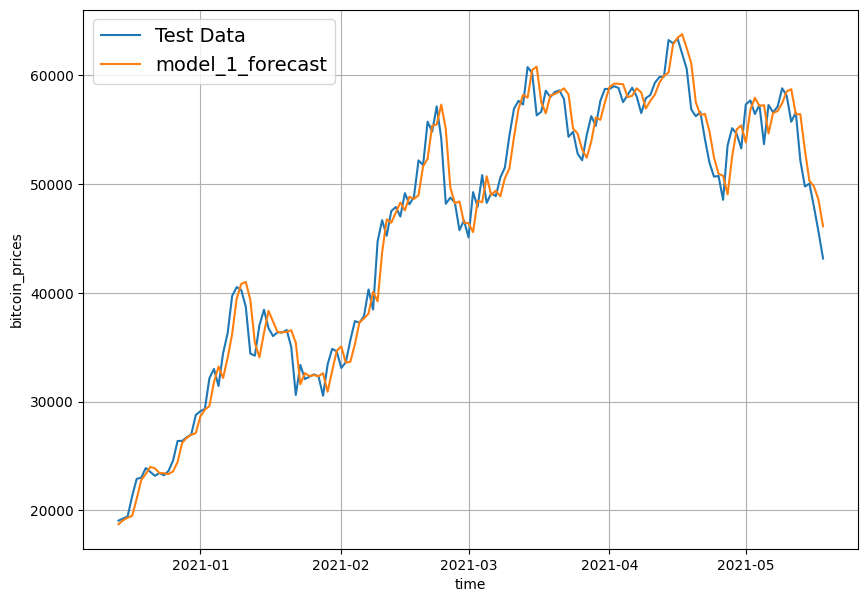

In [ ]:
## lets plot model_1 predictions

offset=400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format='-', label='Test Data')
##plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.squeeze(test_labels), start=offset, format='-', label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='model_1_forecast')

## Model2: Dense(windows=30, horizon=1)

In [ ]:
##window_size, horizon for model-2
HORIZON = 1
WINDOW_SIZE = 30


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
# build model

model_2 = tf.keras.Sequential([
      layers.Dense(128, activation='relu'),
      layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows, test_labels),
            batch_size=128,
            verbose=0,
            callbacks=create_model_checkpoint(model_name=model_2.name))

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 614.2758 - mae: 614.2758 - mse: 1292025.0000


[614.2757568359375, 614.2757568359375, 1292025.0]

In [ ]:
model_2 = tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 611.4374 - mae: 611.4374 - mse: 1284951.6250


[611.4374389648438, 611.4374389648438, 1284951.625]

In [ ]:
model2_preds = make_forecast(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_results(tf.squeeze(test_labels), model2_preds)
model_2_results

{'mae': 611.43744,
 'mse': 1284951.6,
 'rmse': 1133.557,
 'mape': 2.7445447,
 'mase': 1.0687987}

In [ ]:
model_1_results

{'mae': 570.5795,
 'mse': 1183917.9,
 'rmse': 1088.0798,
 'mape': 2.565008,
 'mase': 1.0023502}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Note WINDOW_SIZE=7 performs better than considering 30 days window size

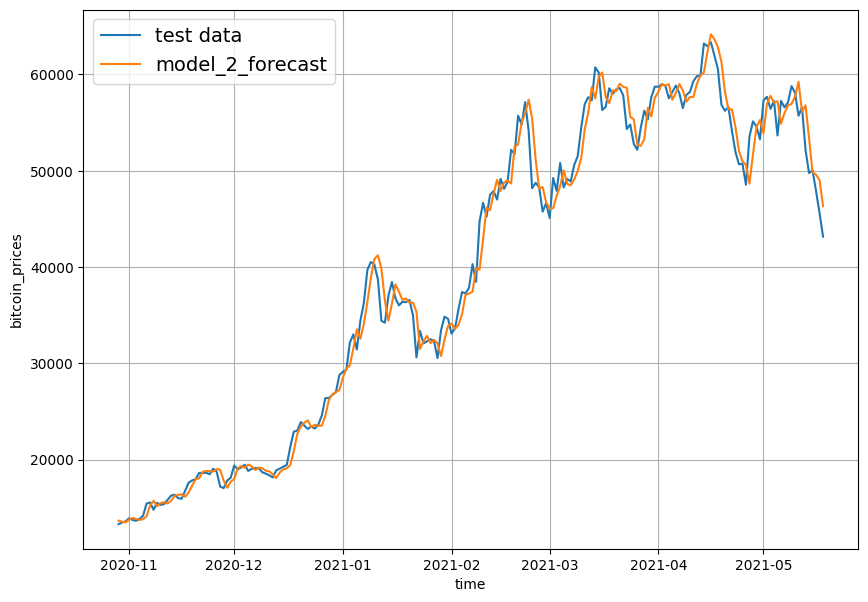

In [ ]:
offset=350
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], format='-', start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model2_preds, format='-', start=offset, label='model_2_forecast')

## Model-3: Dense( window=30, horizon=7)

In [ ]:
##window_size, horizon for model-2
HORIZON = 7
WINDOW_SIZE = 30


In [ ]:
full_windows, full_labels  = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer='adam')

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2112.8479 

18/18 [==============================] - 3s 124ms/step - loss: 1670.5564 - val_loss: 2961.3325
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 550.8463

18/18 [==============================] - 2s 93ms/step - loss: 539.2536 - val_loss: 2729.9565
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 400.0471

18/18 [==============================] - 1s 87ms/step - loss: 399.7321 - val_loss: 1921.4952
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 418.6970

18/18 [==============================] - 1s 41ms/step - loss: 344.1955 - val_loss: 1760.0692
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 328.0841

18/18 [==============================] - 1s 59ms/step - loss: 313.1638 - val_loss: 1577.9696
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 281.7914

18/18 [==============================] - 1s 76ms/step - loss: 295.1308 - val_loss: 1484.1343
Epoch 7/100
18/18 [==============================] - 0s 14ms/step - loss: 282.3740 - val_loss: 1509.3488
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 287.5338

18/18 [==============================] - 1s 78ms/step - loss: 281.7498 - val_loss: 1435.7640
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 267.6198 - val_loss: 1458.0703
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 268.2605 - val_loss: 1531.1361
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 265.1866 - val_loss: 1501.6866
Epoch 12/100
18/18 [==============================] - 0s 11ms/step - loss: 270.1161 - val_loss: 1747.8364
Epoch 13/100
18/18 [==============================] - 0s 14ms/step - loss: 271.6703 - val_loss: 1723.7112
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 259.0967

18/18 [==============================] - 1s 70ms/step - loss: 259.0967 - val_loss: 1408.9340
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 255.5881 - val_loss: 1453.0518
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 258.2398

18/18 [==============================] - 1s 33ms/step - loss: 261.4596 - val_loss: 1402.2094
Epoch 17/100
18/18 [==============================] - 0s 13ms/step - loss: 262.0490 - val_loss: 1431.8002
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 244.6241

18/18 [==============================] - 3s 146ms/step - loss: 252.4639 - val_loss: 1357.7482
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 249.4544 - val_loss: 1383.4860
Epoch 20/100
18/18 [==============================] - 0s 12ms/step - loss: 250.2480 - val_loss: 1395.4972
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 256.8286 - val_loss: 1477.6772
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 251.8246 - val_loss: 1483.7106
Epoch 23/100
13/18 [====================>.........] - ETA: 0s - loss: 245.5600

18/18 [==============================] - 2s 89ms/step - loss: 245.5953 - val_loss: 1346.7046
Epoch 24/100
18/18 [==============================] - 0s 14ms/step - loss: 252.8870 - val_loss: 1392.5742
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 254.5757

18/18 [==============================] - 2s 103ms/step - loss: 244.6800 - val_loss: 1340.1844
Epoch 26/100
18/18 [==============================] - 0s 17ms/step - loss: 242.1597 - val_loss: 1594.5602
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 262.2889

18/18 [==============================] - 1s 87ms/step - loss: 251.6842 - val_loss: 1339.7524
Epoch 28/100
18/18 [==============================] - 0s 16ms/step - loss: 241.7710 - val_loss: 1471.2906
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 248.7574 - val_loss: 1517.6865
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 244.6953 - val_loss: 1379.3948
Epoch 31/100
18/18 [==============================] - 0s 14ms/step - loss: 242.6999 - val_loss: 1382.7928
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 233.2105

18/18 [==============================] - 1s 65ms/step - loss: 239.2355 - val_loss: 1323.2793
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 255.3127 - val_loss: 1337.2521
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 241.5251

18/18 [==============================] - 1s 56ms/step - loss: 242.6214 - val_loss: 1321.4775
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 241.5891 - val_loss: 1421.5973
Epoch 36/100
13/18 [====================>.........] - ETA: 0s - loss: 233.8669

18/18 [==============================] - 1s 51ms/step - loss: 237.2672 - val_loss: 1319.2253
Epoch 37/100
18/18 [==============================] - 0s 8ms/step - loss: 246.0449 - val_loss: 1378.7432
Epoch 38/100
18/18 [==============================] - 0s 7ms/step - loss: 250.0062 - val_loss: 1430.9047
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 253.7054

18/18 [==============================] - 1s 47ms/step - loss: 245.8007 - val_loss: 1318.7848
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 237.1094 - val_loss: 1388.9281
Epoch 41/100
18/18 [==============================] - 0s 15ms/step - loss: 242.8633 - val_loss: 1471.9351
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 239.6848

18/18 [==============================] - 1s 53ms/step - loss: 237.3346 - val_loss: 1299.6163
Epoch 43/100
18/18 [==============================] - 0s 12ms/step - loss: 237.5616 - val_loss: 1553.0265
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 248.4328 - val_loss: 1374.4349
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 241.0184 - val_loss: 1401.7706
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 232.5448

18/18 [==============================] - 1s 39ms/step - loss: 232.5448 - val_loss: 1274.4095
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 231.0469 - val_loss: 1423.1162
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 241.1372 - val_loss: 1345.2358
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 234.8868 - val_loss: 1295.8707
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 234.3573 - val_loss: 1476.8624
Epoch 51/100
18/18 [==============================] - 0s 12ms/step - loss: 235.2553 - val_loss: 1328.4545
Epoch 52/100
18/18 [==============================] - 0s 12ms/step - loss: 236.6234 - val_loss: 1353.7128
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 235.6925 - val_loss: 1581.4502
Epoch 54/100
18/18 [==============================] - 0s 14ms/step - loss: 241.2876 - val_loss: 1363.0470
Epoch 55/100
18/18 [==============================] - 0s 12ms/s

18/18 [==============================] - 1s 41ms/step - loss: 237.4808 - val_loss: 1260.7363
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 234.0764 - val_loss: 1269.1028
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 228.5970 - val_loss: 1312.9458
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 228.4117 - val_loss: 1353.3571
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 226.4263 - val_loss: 1268.3405
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 232.1777 - val_loss: 1266.4866
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 225.8185 - val_loss: 1387.5917
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4445 - val_loss: 1268.6046
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 228.9768 - val_loss: 1272.6881
Epoch 73/100
18/18 [==============================] - 0s 10ms/step 

18/18 [==============================] - 1s 50ms/step - loss: 228.3471 - val_loss: 1250.3813
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 226.1993 - val_loss: 1448.5725
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 232.6318 - val_loss: 1296.6162
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 224.7275 - val_loss: 1270.9022
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 234.4707 - val_loss: 1335.5475
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 227.4489 - val_loss: 1291.9292
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 225.8877 - val_loss: 1299.6722
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 233.5613 - val_loss: 1276.9633
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 230.4037 - val_loss: 1504.6597
Epoch 86/100
18/18 [==============================] - 0s 8ms/step -

18/18 [==============================] - 1s 35ms/step - loss: 224.6210 - val_loss: 1244.1835
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 225.3962 - val_loss: 1284.5872
Epoch 90/100
18/18 [==============================] - 0s 13ms/step - loss: 225.7634 - val_loss: 1298.1398
Epoch 91/100
18/18 [==============================] - 0s 14ms/step - loss: 221.9564 - val_loss: 1365.4512
Epoch 92/100
11/18 [=================>............] - ETA: 0s - loss: 229.2054

18/18 [==============================] - 2s 132ms/step - loss: 221.9562 - val_loss: 1239.3483
Epoch 93/100
18/18 [==============================] - 0s 19ms/step - loss: 225.4119 - val_loss: 1441.9559
Epoch 94/100
18/18 [==============================] - 0s 14ms/step - loss: 228.7495 - val_loss: 1300.7915
Epoch 95/100
18/18 [==============================] - 0s 14ms/step - loss: 223.8713 - val_loss: 1251.7377
Epoch 96/100
18/18 [==============================] - 0s 15ms/step - loss: 221.9674 - val_loss: 1265.5874
Epoch 97/100
18/18 [==============================] - 0s 13ms/step - loss: 222.1323 - val_loss: 1253.1451
Epoch 98/100
10/18 [===============>..............] - ETA: 0s - loss: 232.4516

18/18 [==============================] - 1s 61ms/step - loss: 227.4850 - val_loss: 1225.8412
Epoch 99/100
18/18 [==============================] - 0s 10ms/step - loss: 222.2958 - val_loss: 1412.3186
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 224.3238 - val_loss: 1277.8409


In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1277.8412


1277.8411865234375

In [ ]:
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1225.8414


1225.8414306640625

In [ ]:
model_3_preds = make_forecast(model_3, test_windows)
model_3_preds[:10], model_3_preds.shape

18/18 [==============================] - 0s 2ms/step


(<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
 array([[9229.803 , 9327.996 , 9125.444 , 9366.352 , 9468.013 , 9498.105 ,
         9488.313 ],
        [9099.007 , 9147.618 , 8835.068 , 9214.114 , 9125.478 , 9165.071 ,
         9189.614 ],
        [9037.353 , 8976.453 , 8855.824 , 9111.698 , 9213.152 , 9113.83  ,
         9058.884 ],
        [8977.494 , 9042.564 , 8985.225 , 9192.533 , 9392.337 , 9302.704 ,
         9174.1455],
        [8752.773 , 9055.497 , 8959.769 , 9141.59  , 9294.058 , 9251.631 ,
         8863.239 ],
        [8744.609 , 8919.495 , 8989.473 , 8988.192 , 9217.934 , 9193.482 ,
         8774.636 ],
        [8710.349 , 8960.695 , 8973.239 , 8827.123 , 9003.136 , 8963.729 ,
         8637.724 ],
        [8772.154 , 8938.344 , 8759.768 , 8701.542 , 8901.543 , 8820.261 ,
         8642.95  ],
        [8586.185 , 8537.826 , 8313.256 , 8559.702 , 8719.152 , 8498.886 ,
         8414.099 ],
        [8394.604 , 8373.084 , 8276.432 , 8374.782 , 8658.84  , 8313.865 ,
         83

In [ ]:
test_labels[:10], test_labels.shape

(array([[8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
         8760.89271814, 8749.52059102, 8656.97092235],
        [8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
         8749.52059102, 8656.97092235, 8500.64355816],
        [9081.18687849, 8711.53433917, 8760.89271814, 8749.52059102,
         8656.97092235, 8500.64355816, 8469.2608989 ],
        [8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
         8500.64355816, 8469.2608989 , 8537.33965197],
        [8760.89271814, 8749.52059102, 8656.97092235, 8500.64355816,
         8469.2608989 , 8537.33965197, 8205.80636599],
        [8749.52059102, 8656.97092235, 8500.64355816, 8469.2608989 ,
         8537.33965197, 8205.80636599, 8118.4885358 ],
        [8656.97092235, 8500.64355816, 8469.2608989 , 8537.33965197,
         8205.80636599, 8118.4885358 , 8074.84317361],
        [8500.64355816, 8469.2608989 , 8537.33965197, 8205.80636599,
         8118.4885358 , 8074.84317361, 7612.7405735 ],
        

In [ ]:
model_3_results = evaluate_results(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': array([  564.50305 ,   359.59723 ,   360.69336 ,   525.8344  ,
          493.48004 ,   514.2304  ,   501.80582 ,   573.91974 ,
          478.3593  ,   561.3915  ,   785.81384 ,   764.6759  ,
          995.1857  ,   946.01953 ,   673.241   ,   274.17502 ,
          196.89377 ,   210.80273 ,   232.81355 ,   245.32121 ,
          221.25725 ,   248.11726 ,   400.89252 ,   384.4112  ,
          232.03188 ,   100.982   ,    96.744835,   107.55413 ,
          145.34459 ,   181.67125 ,   236.2493  ,   412.84592 ,
          315.5651  ,   372.9687  ,   277.12473 ,   324.18597 ,
          328.11636 ,   285.31277 ,   231.71017 ,   220.06125 ,
          501.23032 ,    83.8637  ,    69.7041  ,    72.77874 ,
          107.71638 ,   182.8268  ,    77.119   ,    76.53662 ,
          109.038086,   113.01911 ,   145.00027 ,   165.76549 ,
          232.81982 ,   158.366   ,   252.89006 ,   361.5236  ,
          506.25064 ,   529.51624 ,   542.4245  ,   517.46454 ,
          403.9778  ,   191.12576

In [ ]:
model_3_results['mae'].shape, model_3_results['mae'].ndim

((551,), 1)

In [ ]:
# make our evaluation funtion to adapt toe multidimensional array
def evaluate_results(y_true, y_pred):
    # meke sure tf expect the data in float32

    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim >0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {'mae':mae.numpy(), 'mse':mse.numpy(), 'rmse':rmse.numpy(), 'mape':mape.numpy(), 'mase':mase.numpy()}

In [ ]:
model_3_results = evaluate_results(tf.squeeze(test_labels), model_3_preds)
model_3_results

{'mae': 1225.8413,
 'mse': 5252555.0,
 'rmse': 1411.5475,
 'mape': 5.558129,
 'mase': 2.1813161}

Note: the further we predict in the feature the error will be high

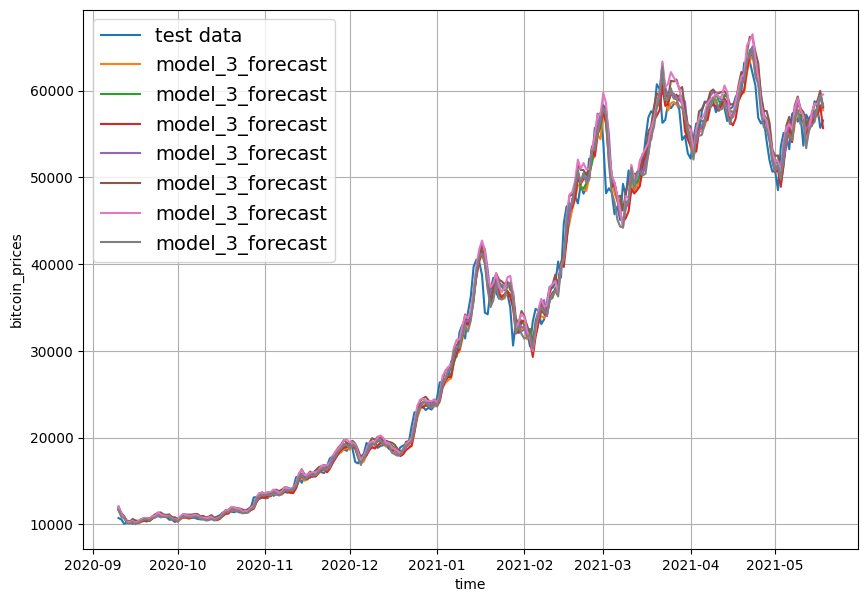

In [ ]:
# visualize forecast

offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, format='-', label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format='-', label='model_3_forecast')

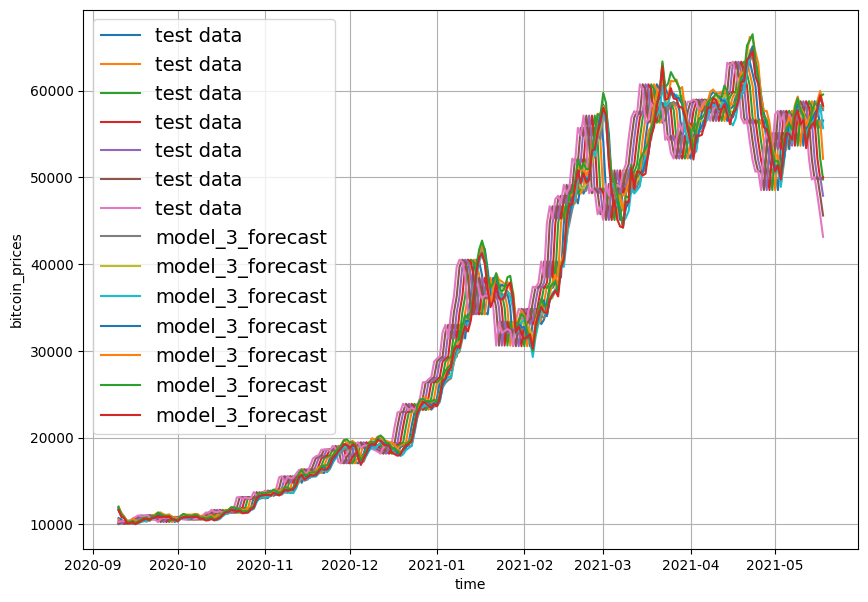

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.squeeze(test_labels), start=offset, format='-', label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format='-', label='model_3_forecast')

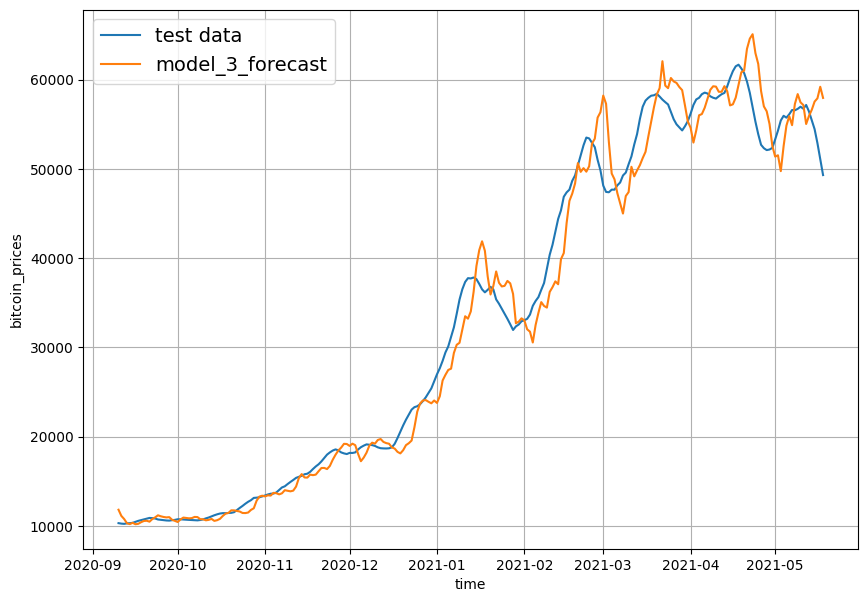

In [ ]:
# lets aggregate the test and forecast
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(tf.squeeze(test_labels), axis=1), start=offset, format='-', label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='model_3_forecast')

## Which of our models performing best so far?

<Axes: >

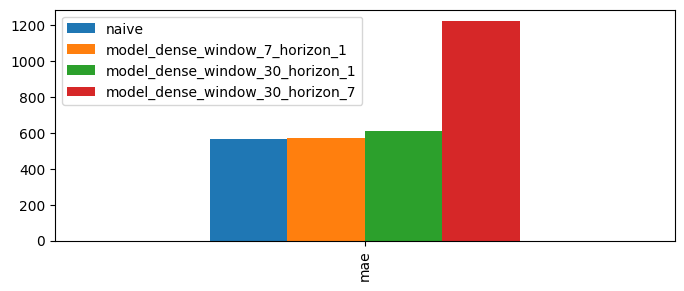

In [ ]:
import pandas as pd

pd.DataFrame({'naive':naive_results['mae'],
              'model_dense_window_7_horizon_1':model_1_results['mae'],
              'model_dense_window_30_horizon_1':model_2_results['mae'],
              'model_dense_window_30_horizon_7':model_3_results['mae']}, index=['mae']).plot(figsize=(8,3), kind='bar')

## Model-4 Conv1d (window_size:7, horizon:1)

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels, test_split=0.2)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# check input shape
train_windows[0].shape


(7,)

In [ ]:
x = tf.constant(train_windows[0])
tf.expand_dims(x, axis=-1).shape

TensorShape([7, 1])

In [ ]:
x = tf.constant(train_windows[0])
tf.expand_dims(x, axis=1).shape

TensorShape([7, 1])

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))

In [ ]:
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
tf.random.set_seed=42

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1203.8102

18/18 [==============================] - 9s 120ms/step - loss: 1203.8102 - val_loss: 2871.0342
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 330.0202

18/18 [==============================] - 1s 55ms/step - loss: 311.0752 - val_loss: 1207.7589
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 185.4362

18/18 [==============================] - 1s 59ms/step - loss: 185.4362 - val_loss: 1003.9460
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 176.1882

18/18 [==============================] - 1s 51ms/step - loss: 174.1943 - val_loss: 958.0258
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 170.6066 - val_loss: 1002.9805
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 167.9476 - val_loss: 958.3646
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 164.8528 - val_loss: 995.9629
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 164.6048

18/18 [==============================] - 1s 56ms/step - loss: 164.6048 - val_loss: 897.1958
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 158.5303 - val_loss: 949.3210
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 156.1579 - val_loss: 902.2192
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 150.1403

18/18 [==============================] - 1s 64ms/step - loss: 153.2256 - val_loss: 850.5900
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 162.6748

18/18 [==============================] - 1s 64ms/step - loss: 149.7953 - val_loss: 827.0579
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 145.6758

18/18 [==============================] - 1s 64ms/step - loss: 147.6061 - val_loss: 812.6978
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 149.1067

18/18 [==============================] - 1s 76ms/step - loss: 148.1179 - val_loss: 803.7391
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 143.5892

18/18 [==============================] - 2s 135ms/step - loss: 143.1485 - val_loss: 783.9910
Epoch 16/100
18/18 [==============================] - 0s 15ms/step - loss: 139.8692 - val_loss: 844.1795
Epoch 17/100
18/18 [==============================] - 0s 13ms/step - loss: 142.8061 - val_loss: 865.0388
Epoch 18/100
14/18 [======================>.......] - ETA: 0s - loss: 145.9413

18/18 [==============================] - 1s 65ms/step - loss: 142.3402 - val_loss: 752.9636
Epoch 19/100
10/18 [===============>..............] - ETA: 0s - loss: 137.2613

18/18 [==============================] - 2s 90ms/step - loss: 135.9034 - val_loss: 736.0957
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 131.6474

18/18 [==============================] - 1s 67ms/step - loss: 132.2741 - val_loss: 720.5555
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 132.7636 - val_loss: 845.5503
Epoch 22/100
14/18 [======================>.......] - ETA: 0s - loss: 139.5456

18/18 [==============================] - 1s 85ms/step - loss: 135.5363 - val_loss: 719.1172
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 128.3693

18/18 [==============================] - 1s 55ms/step - loss: 128.7040 - val_loss: 705.2283
Epoch 24/100
10/18 [===============>..............] - ETA: 0s - loss: 129.7168

18/18 [==============================] - 1s 68ms/step - loss: 129.4355 - val_loss: 695.9677
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 129.3836 - val_loss: 696.6161
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 133.6846

18/18 [==============================] - 1s 65ms/step - loss: 130.4333 - val_loss: 670.1719
Epoch 27/100
18/18 [==============================] - 0s 12ms/step - loss: 122.9184 - val_loss: 679.9103
Epoch 28/100
18/18 [==============================] - 0s 13ms/step - loss: 122.5562 - val_loss: 670.2897
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 124.1957

18/18 [==============================] - 2s 110ms/step - loss: 121.7879 - val_loss: 660.7252
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 118.6016

18/18 [==============================] - 1s 70ms/step - loss: 119.7444 - val_loss: 650.4776
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 120.8908

18/18 [==============================] - 1s 54ms/step - loss: 120.8908 - val_loss: 641.3076
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 119.2564

18/18 [==============================] - 2s 90ms/step - loss: 119.2564 - val_loss: 636.4889
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 120.6452 - val_loss: 676.7156
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 122.2965 - val_loss: 646.0128
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 130.1467 - val_loss: 706.6358
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 131.7545 - val_loss: 789.6193
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 122.3905

18/18 [==============================] - 1s 51ms/step - loss: 122.0485 - val_loss: 627.8550
Epoch 38/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5298 - val_loss: 628.7791
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 113.5749

18/18 [==============================] - 1s 68ms/step - loss: 116.8103 - val_loss: 615.9037
Epoch 40/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4262 - val_loss: 650.6584
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 115.4802 - val_loss: 615.9847
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 115.1926 - val_loss: 619.4651
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 120.0176 - val_loss: 779.1962
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 122.7744 - val_loss: 685.8175
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 119.1468 - val_loss: 637.7040
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4925 - val_loss: 621.3228
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6811

18/18 [==============================] - 1s 42ms/step - loss: 114.2868 - val_loss: 601.2707
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 114.2178

18/18 [==============================] - 1s 61ms/step - loss: 114.1734 - val_loss: 597.7534
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 122.8383 - val_loss: 747.6682
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9940 - val_loss: 616.1747
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8959 - val_loss: 610.0047
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5634 - val_loss: 607.6749
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1535 - val_loss: 604.1974
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 131.3396

18/18 [==============================] - 1s 55ms/step - loss: 112.8025 - val_loss: 590.2284
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8491 - val_loss: 616.9622
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 111.4153 - val_loss: 593.5910
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2873 - val_loss: 609.6570
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 112.5595 - val_loss: 646.4033
Epoch 59/100
13/18 [====================>.........] - ETA: 0s - loss: 110.5103

18/18 [==============================] - 1s 59ms/step - loss: 113.5723 - val_loss: 586.4784
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5699 - val_loss: 618.6142
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8840 - val_loss: 675.5216
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5650 - val_loss: 601.5630
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3869 - val_loss: 591.7309
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4304 - val_loss: 595.9907
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0467 - val_loss: 591.4977
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 110.8094

18/18 [==============================] - 1s 41ms/step - loss: 110.8094 - val_loss: 586.3193
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 110.6399 - val_loss: 588.2383
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 97.1180

18/18 [==============================] - 1s 40ms/step - loss: 108.6919 - val_loss: 581.1049
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 108.9822

18/18 [==============================] - 1s 41ms/step - loss: 108.9822 - val_loss: 577.5714
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9553 - val_loss: 646.5093
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 108.1189

18/18 [==============================] - 1s 40ms/step - loss: 110.6182 - val_loss: 575.4868
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 110.2103

18/18 [==============================] - 1s 40ms/step - loss: 110.2103 - val_loss: 573.6545
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 108.0740

18/18 [==============================] - 1s 41ms/step - loss: 108.0740 - val_loss: 573.4952
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 108.0992

18/18 [==============================] - 1s 40ms/step - loss: 108.0992 - val_loss: 572.0026
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2425 - val_loss: 601.3282
Epoch 76/100
15/18 [========================>.....] - ETA: 0s - loss: 107.9515

18/18 [==============================] - 1s 41ms/step - loss: 109.3591 - val_loss: 571.7909
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7887 - val_loss: 592.9283
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 120.8814 - val_loss: 800.5650
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4242 - val_loss: 600.9225
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6982 - val_loss: 582.2168
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6893 - val_loss: 692.2524
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0651 - val_loss: 606.5579
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4927 - val_loss: 689.0708
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2948 - val_loss: 605.3203
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 41ms/step - loss: 109.1885 - val_loss: 568.7786
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7571 - val_loss: 608.8011
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5023 - val_loss: 580.4605
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8114 - val_loss: 584.4168
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 107.0846 - val_loss: 574.1641
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3353 - val_loss: 588.0865
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7511 - val_loss: 605.9710
Epoch 94/100
18/18 [==============================] - ETA: 0s - loss: 111.2502

18/18 [==============================] - 1s 39ms/step - loss: 111.2502 - val_loss: 567.9370
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7448 - val_loss: 578.8110
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2848 - val_loss: 589.9540
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2394 - val_loss: 651.2217
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0814 - val_loss: 593.8015
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9679 - val_loss: 592.8954
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 106.5395 - val_loss: 569.3039


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 569.3038


569.3038330078125

In [ ]:
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.9371


567.9371337890625

In [ ]:
model_4_preds = make_forecast(model_4, test_windows)

18/18 [==============================] - 0s 3ms/step


In [ ]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8906.223, 8811.791, 9031.337, 8804.712, 8791.588, 8770.335,
       8705.275, 8557.623, 8496.648, 8545.269], dtype=float32)>

In [ ]:
model_4_preds.shape

TensorShape([556])

In [ ]:
model_4_results = evaluate_results(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 567.93713,
 'mse': 1171392.8,
 'rmse': 1082.309,
 'mape': 2.5545337,
 'mase': 0.99770826}

## Model-5: LSTM

In [ ]:

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128)(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_lstm')

model_5.compile(loss='mae',
                optimizer='adam')

model_5.fit(train_windows,
            train_labels,
            epochs=8,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/8
13/18 [====================>.........] - ETA: 0s - loss: 3161.0154 

18/18 [==============================] - 7s 237ms/step - loss: 3157.6580 - val_loss: 20094.7070
Epoch 2/8
15/18 [========================>.....] - ETA: 0s - loss: 3141.4443

18/18 [==============================] - 5s 266ms/step - loss: 3156.1484 - val_loss: 20093.7109
Epoch 3/8
11/18 [=================>............] - ETA: 0s - loss: 3231.3467

18/18 [==============================] - 4s 231ms/step - loss: 3155.4202 - val_loss: 20093.0137
Epoch 4/8
15/18 [========================>.....] - ETA: 0s - loss: 3183.1172

18/18 [==============================] - 4s 242ms/step - loss: 3154.7759 - val_loss: 20092.3809
Epoch 5/8
13/18 [====================>.........] - ETA: 0s - loss: 3175.7627

18/18 [==============================] - 5s 292ms/step - loss: 3154.1533 - val_loss: 20091.8477
Epoch 6/8
11/18 [=================>............] - ETA: 0s - loss: 3213.7156

18/18 [==============================] - 4s 258ms/step - loss: 3153.6340 - val_loss: 20091.3301
Epoch 7/8
14/18 [======================>.......] - ETA: 0s - loss: 3106.5581

18/18 [==============================] - 4s 214ms/step - loss: 3153.1121 - val_loss: 20090.7910
Epoch 8/8
15/18 [========================>.....] - ETA: 0s - loss: 3116.5574

18/18 [==============================] - 4s 251ms/step - loss: 3152.5647 - val_loss: 20090.2461


In [ ]:
## Note the default activation for LSTMlayer is tanh, which may not work well typs of problem so lets change it to relu and see if this would have any effect on model performance
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_lstm')

model_5.compile(loss='mae',
                optimizer='adam')

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 188ms/step - loss: 2910.5374 - val_loss: 12868.4062
Epoch 2/100
18/18 [==============================] - 2s 102ms/step - loss: 1468.7946 - val_loss: 3960.6624
Epoch 3/100
18/18 [==============================] - 2s 106ms/step - loss: 310.0296 - val_loss: 1388.2184
Epoch 4/100
18/18 [==============================] - 2s 100ms/step - loss: 206.1586 - val_loss: 1052.9761
Epoch 5/100
18/18 [==============================] - 2s 140ms/step - loss: 181.9960 - val_loss: 1032.2516
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 178.4183 - val_loss: 1059.9603
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 179.2512 - val_loss: 1068.9076
Epoch 8/100
18/18 [==============================] - 2s 130ms/step - loss: 176.8362 - val_loss: 1028.9253
Epoch 9/100
18/18 [==============================] - 2s 103ms/step - loss: 177.6375 - val_loss: 983.3993
Epoch 10/100
18/18 [============================

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 583.9886


583.9886474609375

In [ ]:
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_lstm')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 583.9674


583.9674072265625

In [ ]:
model_5_preds = make_forecast(model_5, test_windows)

18/18 [==============================] - 0s 3ms/step


In [ ]:
model_5_results = evaluate_results(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 583.9674,
 'mse': 1236251.5,
 'rmse': 1111.8684,
 'mape': 2.6445737,
 'mase': 1.025869}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Making our data Multivariate dataset

What features do we add? In open system like thebitcoin prediction you can use Any feature which influences the bitcoin prices - makes more sense if the feature is directly related.

1. Bitcoin halving events

In [ ]:
# lets make a multivaiate data series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [ ]:
# lets add event
block_reward_1 = 50 # 3 Jan 2009
block_reward_2 = 25  # 8 Nov 2012
block_reward_3 = 12.5  # 9 Jul 2016
block_reward_4 = 6.25 # 18 May 2020

# bloack reward datetime
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

## we will add above info to dataset - datetime range rows would have respective block reward data

In [ ]:
# using np.where https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
# makina a copy of df

bit_prices = bitcoin_prices.copy()
bit_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bit_prices['block_reward'] = np.where(((bitcoin_prices.index>=block_reward_2_datetime) & (bitcoin_prices.index<block_reward_3_datetime)), block_reward_2,
                  np.where(((bitcoin_prices.index>=block_reward_3_datetime)&(bitcoin_prices.index<block_reward_4_datetime)), block_reward_3, block_reward_4))


In [ ]:
bit_prices

,Price,block_reward
Date,,
2013-10-01,123.654990,25.00
2013-10-02,125.455000,25.00
2013-10-03,108.584830,25.00
2013-10-04,118.674660,25.00
2013-10-05,121.338660,25.00
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


In [ ]:
len(bit_prices[bit_prices.block_reward == 25]), len(bit_prices[bit_prices.block_reward == 12.5]), len(bit_prices[bit_prices.block_reward == 6.25])

(1012, 1409, 366)

In [ ]:
## Using indices as in course
# Create date ranges to get indices
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Creating a copy
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

## Add in block rewards
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

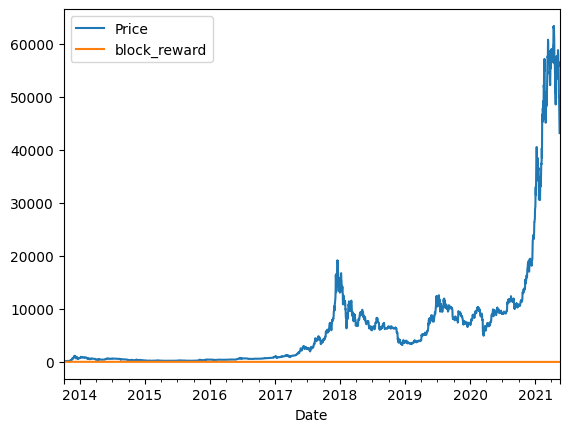

In [ ]:
bitcoin_prices_block.plot()
# th eline appears flat because of the scale

In [ ]:
from sklearn.preprocessing import minmax_scale

scaled_bitcoin_pices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                             columns=bitcoin_prices_block.columns,
                                             index = bitcoin_prices_block.index)


In [ ]:
scaled_bitcoin_pices_block_df.head()

,Price,block_reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0


<Axes: xlabel='Date'>

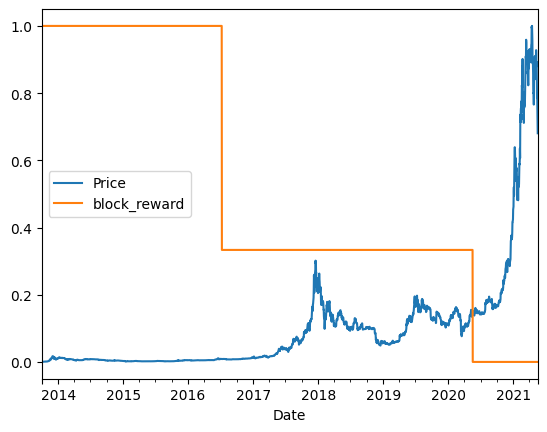

In [ ]:
scaled_bitcoin_pices_block_df.plot()

## Making a windowed dataset with Pandas

In [ ]:
# using Pandas dataframe shift method
# set up data hyperparameters

WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# create windowed df

bitcoin_prices_windowed= bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price_{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```



In [ ]:
bitcoin_prices_windowed.dropna().head()

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,25,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,25,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,25,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Create X and y
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test split
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model-6 Dense (multivariate time series)

In [ ]:
tf.random.set_seed = 42

model_6 = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

model_6.compile(loss='mae',
                optimizer='adam')

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)]
            )

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 4939.1851

18/18 [==============================] - 1s 36ms/step - loss: 2889.5442 - val_loss: 5204.5283
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 796.3908

18/18 [==============================] - 1s 30ms/step - loss: 436.3159 - val_loss: 1057.2415
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 177.2422

18/18 [==============================] - 1s 54ms/step - loss: 227.1647 - val_loss: 953.5964
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 216.6972

18/18 [==============================] - 1s 30ms/step - loss: 166.0922 - val_loss: 853.3013
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 152.3531

18/18 [==============================] - 1s 31ms/step - loss: 152.6897 - val_loss: 846.9243
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 150.4681 - val_loss: 847.7354
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5615

18/18 [==============================] - 1s 29ms/step - loss: 148.8570 - val_loss: 807.9109
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 117.7176

18/18 [==============================] - 0s 28ms/step - loss: 146.6383 - val_loss: 798.8981
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 142.7613 - val_loss: 856.3333
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 140.2040

18/18 [==============================] - 1s 30ms/step - loss: 140.2040 - val_loss: 770.0004
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 147.4994

18/18 [==============================] - 1s 31ms/step - loss: 139.5804 - val_loss: 759.4636
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 138.5508 - val_loss: 783.4841
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8973 - val_loss: 963.1632
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 193.0765

18/18 [==============================] - 0s 29ms/step - loss: 143.0266 - val_loss: 723.7617
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 179.4369

18/18 [==============================] - 0s 28ms/step - loss: 132.4421 - val_loss: 713.0823
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5505

18/18 [==============================] - 0s 28ms/step - loss: 130.5373 - val_loss: 695.3193
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2765

18/18 [==============================] - 1s 37ms/step - loss: 128.6645 - val_loss: 689.0739
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 126.4372 - val_loss: 692.2817
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 125.5210 - val_loss: 783.4701
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 133.0778

18/18 [==============================] - 1s 41ms/step - loss: 133.3791 - val_loss: 664.9446
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 126.4254 - val_loss: 692.2108
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 122.2427

18/18 [==============================] - 1s 49ms/step - loss: 123.8805 - val_loss: 655.1775
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 122.4585 - val_loss: 671.4470
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 120.8143 - val_loss: 678.8725
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 122.9752

18/18 [==============================] - 1s 42ms/step - loss: 121.4276 - val_loss: 640.3228
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 118.8721 - val_loss: 641.2886
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 119.3561 - val_loss: 660.1155
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 120.6123

18/18 [==============================] - 1s 39ms/step - loss: 119.7775 - val_loss: 633.1580
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 118.1975 - val_loss: 700.0973
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 121.0543 - val_loss: 634.9431
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 117.2155

18/18 [==============================] - 1s 30ms/step - loss: 117.2155 - val_loss: 627.0170
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1945 - val_loss: 653.3527
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 100.7534

18/18 [==============================] - 0s 28ms/step - loss: 117.4198 - val_loss: 619.1993
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4784 - val_loss: 673.0879
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 118.1143 - val_loss: 630.0532
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5342 - val_loss: 629.2803
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4662 - val_loss: 696.9824
Epoch 38/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9088 - val_loss: 625.5317
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 133.6244

18/18 [==============================] - 0s 27ms/step - loss: 112.4757 - val_loss: 604.7662
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 83.9079

18/18 [==============================] - 0s 28ms/step - loss: 114.2395 - val_loss: 603.5607
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0001 - val_loss: 615.2744
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0008 - val_loss: 628.5584
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 91.0956

18/18 [==============================] - 1s 29ms/step - loss: 113.2960 - val_loss: 594.6613
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 116.4254 - val_loss: 595.8701
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 111.3735 - val_loss: 600.5624
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7764 - val_loss: 599.9642
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1663 - val_loss: 601.7233
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 79.1483

18/18 [==============================] - 0s 28ms/step - loss: 110.7950 - val_loss: 591.5103
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1857 - val_loss: 592.0807
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7354 - val_loss: 609.2634
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9940 - val_loss: 614.3820
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4112 - val_loss: 724.2262
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3857 - val_loss: 693.7341
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4300 - val_loss: 608.7173
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9931 - val_loss: 604.3909
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7156 - val_loss: 766.0806
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 12

18/18 [==============================] - 0s 28ms/step - loss: 110.2521 - val_loss: 590.1957
Epoch 60/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1915

18/18 [==============================] - 1s 51ms/step - loss: 109.0584 - val_loss: 584.4548
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7360 - val_loss: 681.8857
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 123.6264 - val_loss: 619.2108
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8265 - val_loss: 669.5740
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9215 - val_loss: 588.4782
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5073 - val_loss: 679.3538
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9916 - val_loss: 613.5494
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 93.5755

18/18 [==============================] - 1s 30ms/step - loss: 108.8489 - val_loss: 576.9930
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7013 - val_loss: 589.1957
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1435 - val_loss: 578.2198
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8553 - val_loss: 592.8370
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 106.5179

18/18 [==============================] - 0s 28ms/step - loss: 114.1340 - val_loss: 575.8418
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 117.6969 - val_loss: 708.6331
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8451 - val_loss: 660.9365
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3176 - val_loss: 576.5316
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3916 - val_loss: 576.1317
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3788 - val_loss: 576.0586
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9562 - val_loss: 625.5601
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8614 - val_loss: 607.5040
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6614 - val_loss: 596.7483
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 33ms/step - loss: 114.2290 - val_loss: 571.5749
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8718 - val_loss: 601.5363
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 110.1613

18/18 [==============================] - 1s 41ms/step - loss: 108.7028 - val_loss: 568.5464
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4292 - val_loss: 590.4141
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4774 - val_loss: 623.2371
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1997 - val_loss: 569.8989
Epoch 93/100
16/18 [=========================>....] - ETA: 0s - loss: 107.6021

18/18 [==============================] - 1s 43ms/step - loss: 108.1438 - val_loss: 567.0542
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 107.9247 - val_loss: 608.8400
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3226 - val_loss: 587.3397
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 106.5314 - val_loss: 668.8546
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1673 - val_loss: 570.1302
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0894 - val_loss: 624.3292
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7873 - val_loss: 606.3221
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5042 - val_loss: 595.9459


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 595.9459


595.9459228515625

In [ ]:
model_6 = tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.0541


567.0541381835938

In [ ]:
model_6_preds = make_forecast(model_6, X_test)
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.112, 8772.335, 9021.837, 8792.696, 8743.134, 8734.031,
       8653.125, 8543.033, 8445.998, 8518.998], dtype=float32)>

In [ ]:
model_6_results = evaluate_results(y_test, model_6_preds)
model_6_results

{'mae': 567.0542,
 'mse': 1168355.5,
 'rmse': 1080.9049,
 'mape': 2.5432618,
 'mase': 0.99615717}

In [ ]:
model_1_results

{'mae': 570.5795,
 'mse': 1183917.9,
 'rmse': 1088.0798,
 'mape': 2.565008,
 'mase': 1.0023502}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model-7: N-BEATS algorithm

We will use tensorflow layer subclassing to build the model

In [ ]:
## building and testing N-BEATS block layer

class NBeatBlock(tf.keras.layers.Layer):

    #first we need to initialize the layer
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        # block contain stack of 4 fc layers with Relu non-linearities
        self.hidden = [tf.keras.layers.Dense(self.n_neurons, activation='relu') for _ in range(n_layers)]
        #output of the block in a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # output the forecast and backcast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


In [ ]:
# lets test the N-BEATS block class
tf.random.set_seed=42
dummy_nbeats =  NBeatBlock(input_size=WINDOW_SIZE,
                           theta_size = WINDOW_SIZE + HORIZON,
                           horizon=HORIZON,
                           n_neurons=512,
                           n_layers=4)


In [ ]:
# Create dummy inputs
# noteinputs should rightly match input size
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
bc, fc = dummy_nbeats(dummy_inputs)
# these are just activation outputs from theta layer
bc.numpy(), fc.numpy()

(array([[-0.02257228,  0.19975017, -0.09013016,  0.32718801,  0.04646734,
         -0.08408073, -0.15766793]], dtype=float32),
 array([[0.13032137]], dtype=float32))

### We will use tf data api

- to make our data load fast

In [ ]:
HORIZON=1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price_{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()['Price'].astype(np.float32)

In [ ]:
split_size = int(0.8 * len(X))

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Generate dataset

# train dataset
train_features = tf.data.Dataset.from_tensor_slices(X_train)
train_labels = tf.data.Dataset.from_tensor_slices(y_train)

#test dataset
test_features = tf.data.Dataset.from_tensor_slices(X_test)
test_labels = tf.data.Dataset.from_tensor_slices(y_test)

# zip input and outputs
train_dataset = tf.data.Dataset.zip((train_features, train_labels))
test_dataset = tf.data.Dataset.zip((test_features, test_labels))

# batcha nd prefect
BATCH_SIZE= 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# lets view our dataset
train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [ ]:
for data in train_dataset.take(1):
    print(data[0],'\n', data[1])

tf.Tensor(
[[121.795   120.65533 121.33866 ... 108.58483 125.455   123.65499]
 [123.033   121.795   120.65533 ... 118.67466 108.58483 125.455  ]
 [124.049   123.033   121.795   ... 121.33866 118.67466 108.58483]
 ...
 [654.895   654.725   666.747   ... 673.008   673.832   681.239  ]
 [660.284   654.895   654.725   ... 662.034   673.008   673.832  ]
 [655.418   660.284   654.895   ... 666.747   662.034   673.008  ]], shape=(1024, 7), dtype=float32) 
 tf.Tensor([123.033   124.049   125.96116 ... 660.284   655.418   650.829  ], shape=(1024,), dtype=float32)


### Setting up hyperparameters for N_BEATS algorithm


In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON # in paper they are loking into different horizon times,we areonly looking at 7H
THETA_SIZE = WINDOW_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for Residual connections

N_BEATS uses double residual stacking

In [ ]:
#make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract
subtracted = tf.subtract(tensor_1, tensor_2)

# add
added = tf.add(tensor_1, tensor_2)

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>

In [ ]:
added

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance)

In [ ]:
%%time

tf.random.set_seed=42

# set up N_BEATS block instance
n_beats_block_layer = NBeatBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='initial_block')

# stack inputs
stack_inputs = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_inputs')

#Create initial backcast and forecast
residuals, forecast = n_beats_block_layer(stack_inputs)

# Create stacks

for  i, _ in enumerate(range(N_STACKS -1)):

    # compute residual and forecast
    backcast, block_forecast = NBeatBlock(input_size=INPUT_SIZE,
                                                   theta_size=THETA_SIZE,
                                                   horizon=HORIZON,
                                                   n_neurons=N_NEURONS,
                                                   n_layers=N_LAYERS,
                                                   name=f"nbeat_block_{i}")(residuals)

    #create double residual stacking
    residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
    forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

# put the stack in model
model_7 = tf.keras.Model(stack_inputs, outputs=forecast, name='model_7_nbeats')

model_7.compile(loss='mae',
                optimizer='adam')

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])
                       #create_model_checkpoint(model_name=model_7.name)])

Epoch 1/5000
3/3 [==============================] - 55s 994ms/step - loss: 2033.4011 - val_loss: 10989.4268 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 165ms/step - loss: 3499.9419 - val_loss: 10051.8828 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 64ms/step - loss: 2519.4365 - val_loss: 17762.7539 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 68ms/step - loss: 2759.0959 - val_loss: 14472.0830 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 139ms/step - loss: 1789.9891 - val_loss: 5266.9126 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 63ms/step - loss: 2629.7515 - val_loss: 38887.3320 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 64ms/step - loss: 8301.0557 - val_loss: 13162.6914 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 61ms/step - loss: 2198.1970 - val_loss: 10223.2930 - lr: 0.0010
Epoch 9/5000
3/3 [===========================

In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 580.0777


580.0776977539062

In [ ]:
model_7_preds = make_forecast(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8896.996, 8813.82 , 9010.458, 8789.52 , 8755.438, 8730.731,
       8683.981, 8534.716, 8474.785, 8518.848], dtype=float32)>

In [ ]:
model_7_results = evaluate_results(y_test, model_7_preds)

In [ ]:
model_7_results

{'mae': 580.0777,
 'mse': 1203938.4,
 'rmse': 1097.2412,
 'mape': 2.613954,
 'mase': 1.0190358}

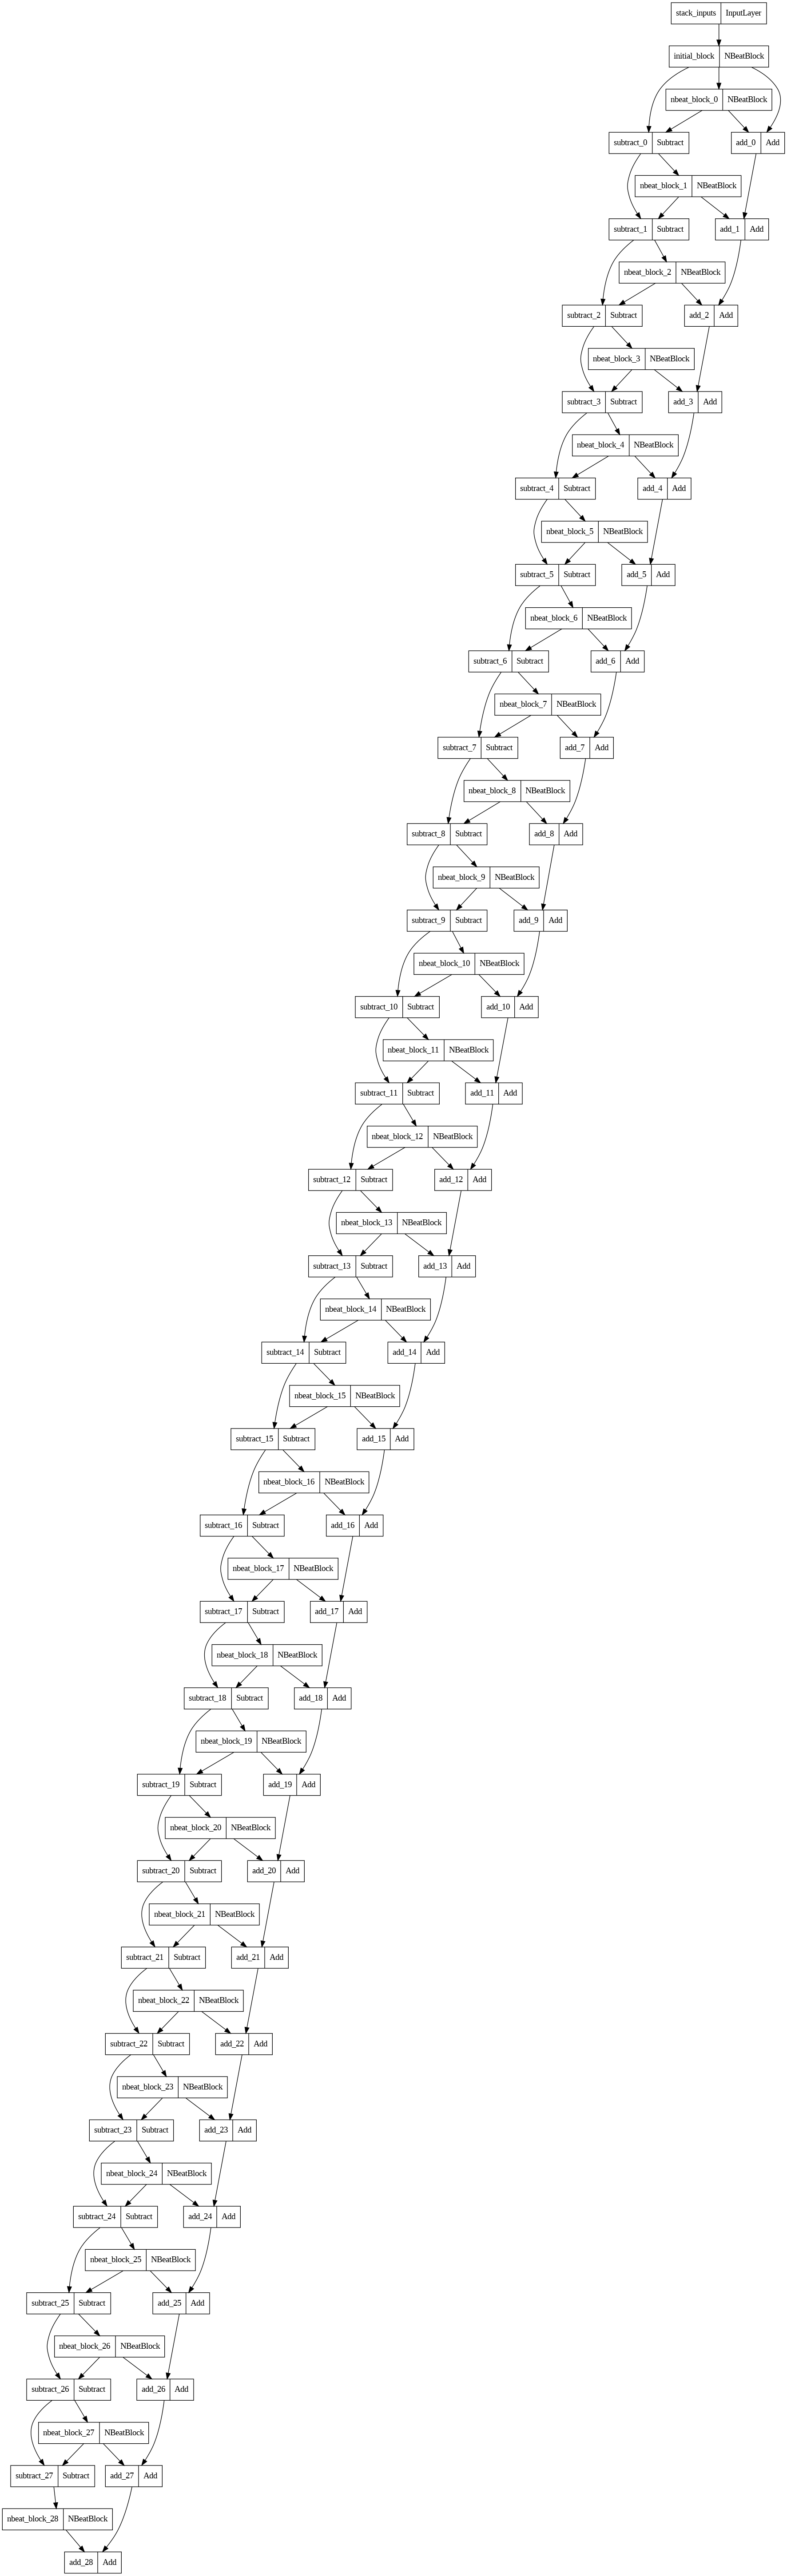

In [ ]:
  # Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

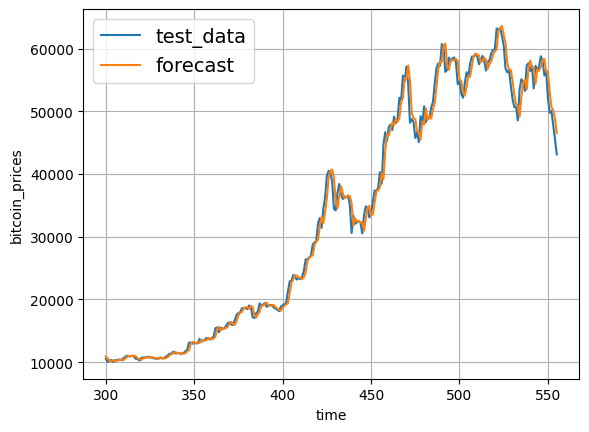

In [ ]:
# lets plot the results

plot_time_series(timesteps=range(len(X_test)), values=y_test, start=300, format='-', label='test_data')
plot_time_series(timesteps=range(len(X_test)), values=model_7_preds, start=300, format='-', label='forecast')

## Model-8: Ensemble model

An ensemble leverages wisdon of crowd effect

In [ ]:
###Construct and fitting the ensemble model

In [ ]:
def get_ensembl_models(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iters=10,
                       num_epochs=1000,
                       loss_fn=['mae', 'mse', 'mape']
                       ):

    ensemble_models=[]

    # Create num_iter number of models per loss function
    for i in range(num_iters):
        #training on three diffremt loss predictions
        for loss_function in loss_fn:
            print()

            model = tf.keras.Sequential([
                  tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                  tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                  tf.keras.layers.Dense(HORIZON)
            ])


            #compile model
            model.compile(loss=loss_function,
                          optimizer='adam',
                          metrics=['mae', 'mse'])

            # fit the model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                      patience=100,
                                                                      verbose=1)])

            #append the model
            ensemble_models.append(model)
    return ensemble_models


In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensembl_models(num_iters=5, num_epochs=1000)



Epoch 146: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 520: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 620: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


Epoch 424: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 524: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


Epoch 132: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 357: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 457: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


Epoch 477: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 667: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 767: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


Epoch 851: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 951: ReduceLROnPlateau reduc

In [ ]:
len(ensemble_models) # should get 15 models (5*3 loss)

15

In [ ]:
X_test.shape

(556, 7)

In [ ]:
# make prediction
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds=[]

    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds, ensemble_preds.shape

1/1 [==============================] - 0s 60ms/step
CPU times: user 803 ms, sys: 33.7 ms, total: 837 ms
Wall time: 12.5 s


(<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
 array([[ 8840.537 ,  8757.947 ,  9073.8125, ..., 50398.42  , 48841.277 ,
         45428.414 ],
        [ 8802.091 ,  8807.314 ,  9032.578 , ..., 50300.527 , 47738.82  ,
         46133.91  ],
        [ 8785.983 ,  8776.271 ,  9102.124 , ..., 49674.17  , 48312.97  ,
         46141.53  ],
        ...,
        [ 8857.88  ,  8784.915 ,  9023.642 , ..., 49104.668 , 49321.38  ,
         46623.09  ],
        [ 8713.788 ,  8777.728 ,  9011.797 , ..., 50841.2   , 48875.816 ,
         46534.62  ],
        [ 8794.104 ,  8824.465 ,  9096.105 , ..., 49878.562 , 48439.094 ,
         45765.29  ]], dtype=float32)>,
 TensorShape([15, 556]))

In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8840.537 ,  8757.947 ,  9073.8125, ..., 50398.42  , 48841.277 ,
        45428.414 ],
       [ 8802.091 ,  8807.314 ,  9032.578 , ..., 50300.527 , 47738.82  ,
        46133.91  ],
       [ 8785.983 ,  8776.271 ,  9102.124 , ..., 49674.17  , 48312.97  ,
        46141.53  ],
       ...,
       [ 8857.88  ,  8784.915 ,  9023.642 , ..., 49104.668 , 49321.38  ,
        46623.09  ],
       [ 8713.788 ,  8777.728 ,  9011.797 , ..., 50841.2   , 48875.816 ,
        46534.62  ],
       [ 8794.104 ,  8824.465 ,  9096.105 , ..., 49878.562 , 48439.094 ,
        45765.29  ]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10], ensemble_mean.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8799.624, 8789.847, 9063.453, 8724.388, 8759.456, 8724.112,
        8663.051, 8503.003, 8456.476, 8527.158], dtype=float32)>,
 TensorShape([556]))

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10], ensemble_median.shape

(array([8807.497 , 8784.915 , 9073.8125, 8729.912 , 8761.263 , 8719.81  ,
        8658.618 , 8503.214 , 8461.757 , 8532.778 ], dtype=float32),
 (556,))

In [ ]:
# EValuate the model based on mena predictions
evaluate_results(y_test, ensemble_mean)

{'mae': 567.50604,
 'mse': 1144465.1,
 'rmse': 1069.7968,
 'mape': 2.5611649,
 'mase': 0.9969509}

In [ ]:
# EValuate the model based median predictions
evaluate_results(y_test, ensemble_median)

{'mae': 564.3739,
 'mse': 1138468.8,
 'rmse': 1066.9905,
 'mape': 2.5512333,
 'mase': 0.99144864}

In [ ]:
ensembl_results = evaluate_results(y_test, ensemble_median)
ensembl_results

{'mae': 564.3739,
 'mse': 1138468.8,
 'rmse': 1066.9905,
 'mape': 2.5512333,
 'mase': 0.99144864}

## Plotting the prediction intervals (***uncertainity estimates***) of our ensemble

Till now we are making point predictions which need not be right, don't you think prediction interval is a better estimate. Remember neither are interval estimates to be right, but it is more preferable when we have a range of estimate than to have a dot estimate.

Application areas:
- market demand
- compute requirements
- marketing campaigns

Interval predictions is equally important as point prediction especially in certain domain problem

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower_bounds(preds):
    # measure the std dev of the prediction
    std = tf.math.reduce_std(preds, axis=0)

    # multiply the std_dev with 1.96
    # (95% of data falls within in this range in Guassian distribution)
    interval = 1.96 * std

    # 4. Get the prediction interval upper and lower bounds
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval

    return lower, upper

In [ ]:
lower, upper = get_upper_lower_bounds(preds=ensemble_preds)

In [ ]:
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8716.381 ,  8750.217 ,  8996.536 ,  8633.72  ,  8706.377 ,
         8627.314 ,  8589.314 ,  8449.356 ,  8384.505 ,  8496.211 ,
         8139.804 ,  8065.1895,  8001.4497,  7571.9956,  7236.7915,
         7243.0337,  7021.3647,  7112.2417,  7020.6343,  7441.168 ,
         7326.7065,  7663.3384,  7482.3247,  7350.22  ,  7272.8696,
         7246.9126,  7178.014 ,  7347.785 ,  7459.3174,  7511.226 ,
         7515.5107,  7298.838 ,  7201.414 ,  7154.0273,  7141.493 ,
         7203.226 ,  7030.6367,  7080.186 ,  6825.822 ,  6540.8335,
         7277.269 ,  7056.1333,  7032.145 ,  7136.242 ,  7150.594 ,
         7120.3096,  7184.386 ,  7181.0415,  7159.9785,  7194.591 ,
         7280.651 ,  7371.7754,  7230.4805,  7149.4834,  7137.5557,
         6907.438 ,  7234.6523,  7268.576 ,  7308.6797,  7650.7163,
         8000.5063,  8071.484 ,  7786.393 ,  8032.985 ,  8048.927 ,
         8113.7344,  8056.035 ,  8663.541 ,  8822.344 ,  8694.238 ,

In [ ]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

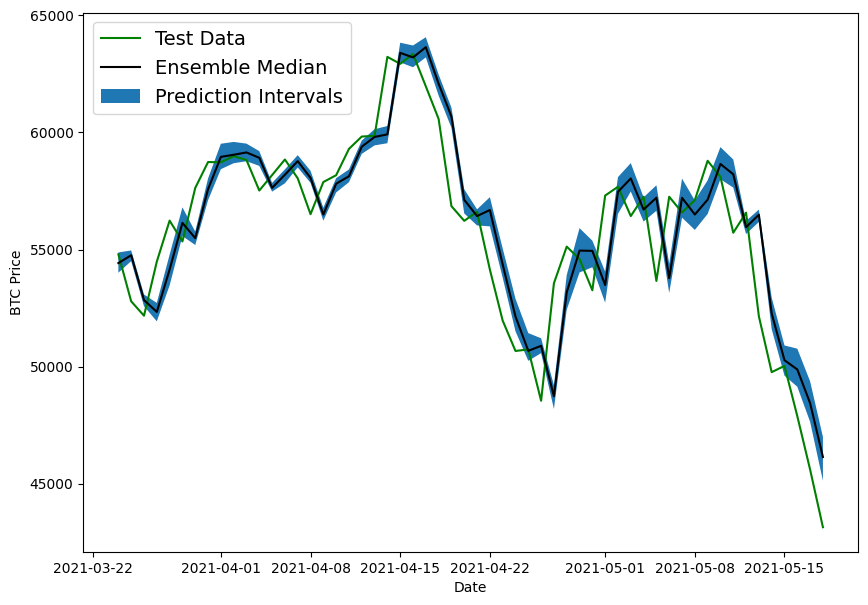

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

all of the model prediction, we observe that the predictions are delayed or lagging behind. mimicing the behaviour of naive model

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

Weve only scratched the surface of uncertainty in machine but if you'd like to learn more, I'd highly recommend checking out the resources located here: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#learning-more-on-uncertainty

## Model-9 : Future Prediction model

Train model on full history data to predict the future

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,Price_7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
#train model on the entire data
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).astype(np.float32)
y_all = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Create TF Dataset
train_data = tf.data.Dataset.from_tensor_slices(X_all)
train_labels = tf.data.Dataset.from_tensor_slices(y_all)
train_dataset = tf.data.Dataset.zip((train_data, train_labels))

# batch and prefecth
BATCH_SIZE=1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
tf.random.set_seed=42

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_9_future_pred')

model_9.compile(loss='mae',
                optimizer='adam')

model_9.fit(train_dataset,
            epochs=100,
            verbose=0,)

### Make prediction into future

To make predictions into the future we want a function which:

1. Takes as input:
 * a list of values (Bitcoin historical data)
 * a trained model (such as `model_9`)
 * a window into the future to predict (our `INTO_FUTURE` variable)
 * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
INTO_FUTURE=14

In [ ]:
tf.expand_dims(y_all[-WINDOW_SIZE:], axis=0)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[56573.555, 52147.82 , 49764.133, 50032.69 , 47885.625, 45604.617,
        43144.473]], dtype=float32)>

In [ ]:
def make_future_predictions(values, model, into_future, window_size):
    """
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare data to forecast on
    future_forecast =[]
    last_window = values[-window_size:]

    # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
    for i in range(into_future):

      # Predict on the last window then append it again and repeat for each iteration (our model will eventually start to make forecasts on its own forecasts)
      pred = model.predict(tf.expand_dims(last_window, axis=0), verbose=0)
      print(f"Prediction on {last_window} --> Prediction: {tf.squeeze(pred).numpy()}\n")

      # Append prediction
      future_forecast.append(tf.squeeze(pred).numpy())

      # Update the last_window
      last_window= np.append(last_window, pred)[-window_size:]

    return future_forecast

In [ ]:
# make futur eforecast
future_forecast = make_future_predictions(values=y_all,
                                          model=model_9,
                                          into_future=INTO_FUTURE,
                                          window_size=WINDOW_SIZE)

Prediction on Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, dtype: float32 --> Prediction: 55052.47265625

Prediction on [52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 55052.473] --> Prediction: 50135.76953125

Prediction on [49764.133 50032.69  47885.625 45604.617 43144.473 55052.473 50135.77 ] --> Prediction: 48372.79296875

Prediction on [50032.69  47885.625 45604.617 43144.473 55052.473 50135.77  48372.793] --> Prediction: 48040.9296875

Prediction on [47885.625 45604.617 43144.473 55052.473 50135.77  48372.793 48040.93 ] --> Prediction: 47142.64453125

Prediction on [45604.617 43144.473 55052.473 50135.77  48372.793 48040.93  47142.645] --> Prediction: 46709.51953125

Prediction on [43144.473 55052.473 50135.77  48372.793 48040.93  47142.645 46709.52 ] --> Prediction: 47974.23828125

Prediction on [55052.473 

### Plot future forecast

In [ ]:
future_forecast

[55052.473,
 50135.77,
 48372.793,
 48040.93,
 47142.645,
 46709.52,
 47974.24,
 52487.26,
 48381.285,
 47552.7,
 47608.31,
 47638.008,
 48031.875,
 49216.785]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
    """
    Returns array of datetime values ranging from start_date to start_date+into_future
    """
    start_date=start_date + np.timedelta64(offset, 'D') # 'D' stands for day
    end_date = start_date + np.timedelta64(into_future, 'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
lasttimestep = bitcoin_prices.index[-1]
lasttimestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# plot the
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=lasttimestep, into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [ ]:
## Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, lasttimestep)
future_forecast = np.insert(future_forecast, 0, btc_prices[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55052.473, 50135.77 , 48372.793, 48040.93 , 47142.645,
        46709.52 , 47974.24 , 52487.26 , 48381.285, 47552.7  , 47608.31 ,
        47638.008, 48031.875, 49216.785], dtype=float32))

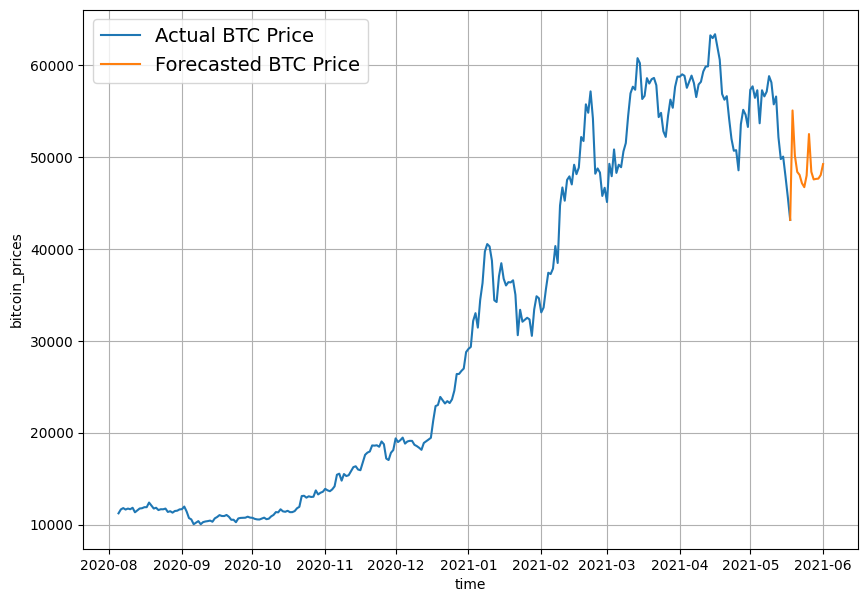

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_prices, start=2500, format='-', label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-', label='Forecasted BTC Price')

## Model 10: Why forecasting is BS (the turkey problem 🦃)

completly unpredictable event - the Black Swan problem
1000 days trend looks good..1001 - sudden fall by 100x

In [ ]:
#introduce a turkey prolbme to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] /100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

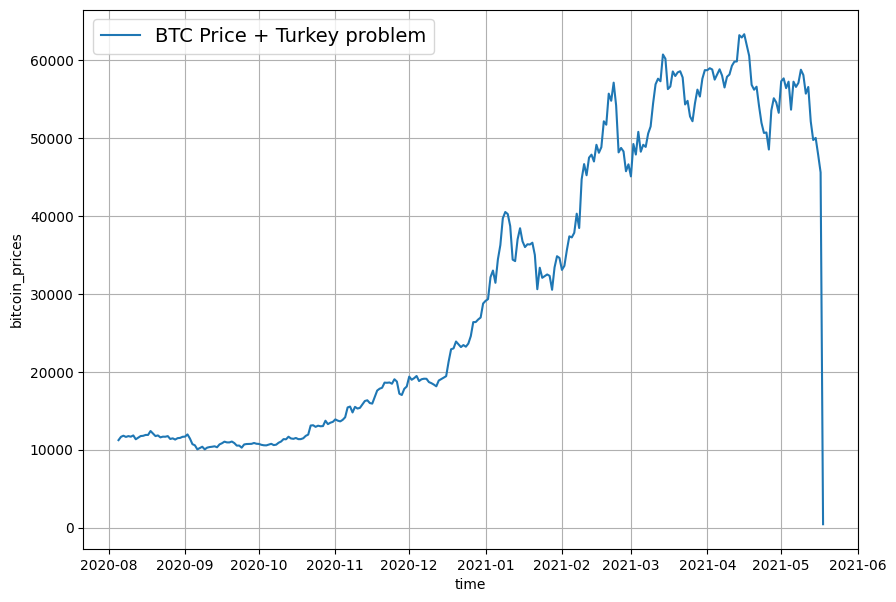

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey, values=btc_price_turkey, start=2500, format='-', label='BTC Price + Turkey problem')

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# create train and test data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels, test_split=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_10_turkey_problem')

# #or just clone
# model_10 = tf.keras.models.clone_model(model_1)
# model_10._name = 'model_10_turkey_problem'

model_10.compile(loss='mae',
                 optimizer='adam')

model_10.fit(X_train, y_train,
             epochs=100,
             batch_size=128,
             validation_data=(X_test, y_test),
             callbacks=[create_model_checkpoint(model_name=model_10.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 18s - loss: 3676.4014

18/18 [==============================] - 2s 41ms/step - loss: 1076.5570 - val_loss: 1204.8411
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 258.8645 - val_loss: 1323.3468
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 204.3843 - val_loss: 1309.6079
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 220.4764

18/18 [==============================] - 1s 35ms/step - loss: 177.8022 - val_loss: 1016.8941
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 165.2640 - val_loss: 1159.9091
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 155.0278

18/18 [==============================] - 1s 35ms/step - loss: 161.5375 - val_loss: 1005.2465
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 182.6447

18/18 [==============================] - 1s 35ms/step - loss: 146.1288 - val_loss: 911.6556
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 139.3985 - val_loss: 912.8090
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 137.8683

18/18 [==============================] - 1s 36ms/step - loss: 136.5865 - val_loss: 785.5856
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 126.9648 - val_loss: 792.3288
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8391 - val_loss: 819.7073
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 135.1294

18/18 [==============================] - 1s 37ms/step - loss: 133.2985 - val_loss: 728.7980
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 90.2582

18/18 [==============================] - 1s 37ms/step - loss: 129.5564 - val_loss: 710.8445
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 126.1978 - val_loss: 761.6097
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 119.4365

18/18 [==============================] - 1s 37ms/step - loss: 120.8903 - val_loss: 698.0680
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 118.6967 - val_loss: 792.0143
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1964 - val_loss: 831.2870
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0533 - val_loss: 718.8761
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 116.3755 - val_loss: 752.9769
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1377

18/18 [==============================] - 1s 36ms/step - loss: 123.0164 - val_loss: 679.5914
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 116.9065

18/18 [==============================] - 1s 52ms/step - loss: 113.4903 - val_loss: 663.9437
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 111.7568

18/18 [==============================] - 1s 52ms/step - loss: 112.5499 - val_loss: 662.9116
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4612 - val_loss: 663.6182
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 130.7721 - val_loss: 691.3895
Epoch 25/100
12/18 [===================>..........] - ETA: 0s - loss: 128.9411

18/18 [==============================] - 1s 38ms/step - loss: 130.9596 - val_loss: 659.5751
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 114.2172 - val_loss: 668.0292
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5499 - val_loss: 741.6772
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5986 - val_loss: 668.5790
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5566 - val_loss: 753.1123
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 102.8021

18/18 [==============================] - 1s 36ms/step - loss: 115.2548 - val_loss: 654.7198
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6475 - val_loss: 778.6414
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5647 - val_loss: 953.1621
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 132.9246 - val_loss: 762.6880
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 114.9434

18/18 [==============================] - 1s 36ms/step - loss: 114.6657 - val_loss: 650.0018
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2312 - val_loss: 675.7318
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 89.1242

18/18 [==============================] - 1s 36ms/step - loss: 110.8880 - val_loss: 649.0810
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 108.1535 - val_loss: 756.7237
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0325 - val_loss: 670.8212
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0643 - val_loss: 698.9244
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8552 - val_loss: 701.9905
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2587 - val_loss: 691.9548
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9226 - val_loss: 776.0323
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8624 - val_loss: 684.0519
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 120.6415

18/18 [==============================] - 1s 36ms/step - loss: 118.7547 - val_loss: 645.8286
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6633 - val_loss: 660.3503
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 110.4793 - val_loss: 854.2807
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5659 - val_loss: 650.0099
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5223 - val_loss: 793.1370
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0876 - val_loss: 654.6447
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9210 - val_loss: 698.7022
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4538 - val_loss: 740.5402
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4104 - val_loss: 668.3965
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 10

18/18 [==============================] - 1s 36ms/step - loss: 105.4700 - val_loss: 645.4960
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3850 - val_loss: 674.7166
Epoch 56/100
17/18 [===========================>..] - ETA: 0s - loss: 107.2927

18/18 [==============================] - 1s 37ms/step - loss: 106.8691 - val_loss: 643.7161
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2396 - val_loss: 654.7484
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 104.9897 - val_loss: 663.6961
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3236 - val_loss: 793.4919
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3503 - val_loss: 653.6644
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5650 - val_loss: 647.9996
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4009 - val_loss: 645.4532
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6684 - val_loss: 661.0502
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8207 - val_loss: 696.3085
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 36ms/step - loss: 108.5371 - val_loss: 643.3091
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0720 - val_loss: 655.7163
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2877 - val_loss: 684.9484
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3141 - val_loss: 658.7072
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4978 - val_loss: 659.4208
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 104.6597 - val_loss: 699.3397
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 109.7764 - val_loss: 795.3600
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 116.8982 - val_loss: 666.9614
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8337 - val_loss: 648.8423
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 41ms/step - loss: 109.9385 - val_loss: 642.5588
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 108.0929 - val_loss: 701.4593
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 112.2955 - val_loss: 717.9573
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2674 - val_loss: 702.6779
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 105.1324 - val_loss: 672.5397
Epoch 86/100
13/18 [====================>.........] - ETA: 0s - loss: 103.2400

18/18 [==============================] - 1s 53ms/step - loss: 106.2355 - val_loss: 642.5204
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 108.1429 - val_loss: 648.9836
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 107.3048 - val_loss: 648.3708
Epoch 89/100
18/18 [==============================] - 0s 8ms/step - loss: 114.0818 - val_loss: 744.1559
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 123.5614 - val_loss: 656.2269
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0158 - val_loss: 717.1345
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6405 - val_loss: 657.9263
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4606 - val_loss: 644.7852
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2057 - val_loss: 653.2892
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 10

In [ ]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 688.4398


688.4397583007812

In [ ]:
model_10 = tf.keras.models.load_model('/content/model_experiments/model_10_turkey_problem')
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 642.5204


642.5204467773438

In [ ]:
model_10_preds = make_forecast(model_10, X_test)
model_10_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8810.84 , 8752.607, 9033.497, 8751.952, 8734.116, 8731.055,
       8659.035, 8512.024, 8439.186, 8522.129], dtype=float32)>

In [ ]:
model_10_results = evaluate_results(y_test, model_10_preds)
model_10_results

{'mae': 17138.512,
 'mse': 615032770.0,
 'rmse': 23730.5,
 'mape': 121.481735,
 'mase': 26.521902}

In [ ]:
model_1_results

{'mae': 570.5795,
 'mse': 1183917.9,
 'rmse': 1088.0798,
 'mape': 2.565008,
 'mase': 1.0023502}

Changing one single data point the unpredictable event, changed the performance of the model. Danger of forecasting, model will fail to predict a datapoint which it has never seen before or anything outside the distribution of data that it was trained on. Model can only predict what it has seen before

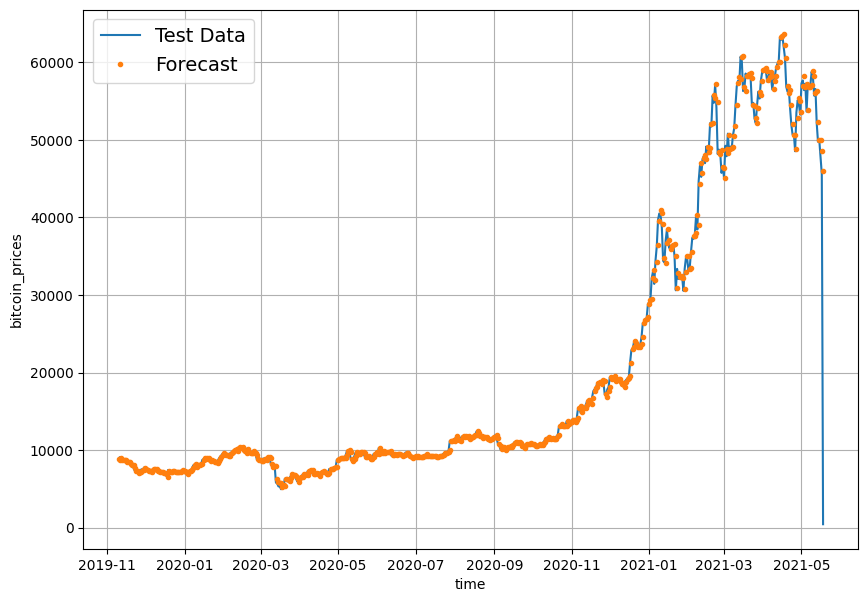

In [ ]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
         values=btc_price_turkey[-len(y_test):],
         start=offset,
         format='-',
         label='Test Data')
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
         values=model_10_preds,
         start=offset,
         label='Forecast')

## Compare results

In [ ]:
all_results_df = pd.DataFrame({'naive_model':naive_results,
              'model_1_dense_w7_h1':model_1_results,
              'model_2_dense_w30_h1':model_2_results,
              'model_3_dense_w7_h7':model_3_results,
              'model_4_CONV1D':model_4_results,
              'model_5_LSTM':model_5_results,
              'model_6_multivariate':model_6_results,
              'model_7_NBEATS':model_7_results,
              'model_8_ensemble':ensembl_results,
              'model_10_turkey_problem':model_10_results}).T

In [ ]:
all_results_df

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,570.579529,1.183918e+06,1088.079834,2.565008,1.002350
model_2_dense_w30_h1,611.437439,1.284952e+06,1133.557007,2.744545,1.068799
model_3_dense_w7_h7,1225.841309,5.252555e+06,1411.547485,5.558129,2.181316
model_4_CONV1D,567.937134,1.171393e+06,1082.308960,2.554534,0.997708
model_5_LSTM,583.967407,1.236252e+06,1111.868408,2.644574,1.025869
model_6_multivariate,567.054199,1.168356e+06,1080.904907,2.543262,0.996157
model_7_NBEATS,580.077698,1.203938e+06,1097.241211,2.613954,1.019036
model_8_ensemble,564.373901,1.138469e+06,1066.990479,2.551233,0.991449
model_10_turkey_problem,17138.511719,6.150328e+08,23730.500000,121.481735,26.521902


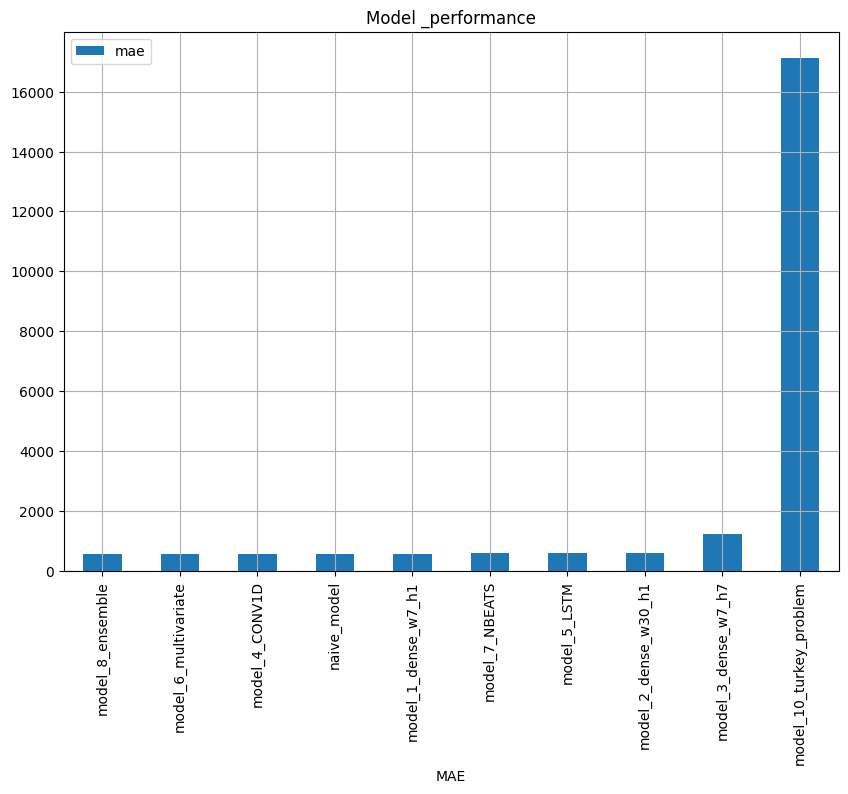

In [ ]:
# Sort model results by MAE and plot them
all_results_df[['mae']].sort_values('mae').plot(figsize=(10,7), kind='bar', xlabel='MAE', title='Model _performance', grid=True)
plt.show()

If all of the models are predicting the same way then either your models  are overfitting on train data or your problem is unpredictable